# P A C K A G E : : : C O M P A R I S O N

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# importing bayexpress results, all (clean) replicates included
# differential gene expression analysis was done in do_DGE.ipynb

RALL_bayexpress = pd.read_csv('DGE_results/RALL_bayexpress.csv').iloc[:,1:].rename(columns={'genes': "locus_name"})

# we don't loose any genes here for nans
# RALL_bayexpress = RALL_bayexpress.dropna(subset=['BF_21', 'FC'])

# criteria 0 for significance: (BF_21 > 1) & (abs(FC) > 0)
RALL_bayexpress['FC0_bayexpress'] = (RALL_bayexpress.BF_21 > 1) & (abs(RALL_bayexpress.FC) > 0)

# criteria 1 for significance: (BF_21 > 1) & (abs(FC) > 1)
RALL_bayexpress['FC1_bayexpress'] = (RALL_bayexpress.BF_21 > 1) & (abs(RALL_bayexpress.FC) > 1)

# criteria 2 for significance: (BF_21 > 1) & (abs(FC) > 2)
RALL_bayexpress['FC2_bayexpress'] = (RALL_bayexpress.BF_21 > 1) & (abs(RALL_bayexpress.FC) > 2)

RALL_bayexpress

,locus_name,BF_21,FC,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress
0,15S_rRNA,-3.710645,0.274047,False,False,False
1,21S_rRNA,-1.302642,0.147177,False,False,False
2,HRA1,-5.206545,-0.564787,False,False,False
3,ICR1,76.746125,0.504048,True,False,False
4,LSR1,0.451012,0.120243,False,False,False
...,...,...,...,...,...,...
7121,tY(GUA)J2,-7.312143,0.861839,False,False,False
7122,tY(GUA)M1,-7.406574,0.022303,False,False,False
7123,tY(GUA)M2,-7.727890,0.183767,False,False,False
7124,tY(GUA)O,-7.622253,0.347266,False,False,False


In [3]:
# importing edgeR results, all (clean) replicates included
# differential gene expression analysis was done in do_DGE.ipynb

RALL_edgeR = pd.read_csv('DGE_results/RALL_edgeR.csv').rename(columns={'genes': "locus_name"})

# we don't loose any genes here for nans
# RALL_edgeR = RALL_edgeR.dropna(subset=['logFC', 'PValue'])


# criteria 0 for significance: (pvalue < 0.05) & (abs(log2FoldChange) > 0)
RALL_edgeR['FC0_edgeR'] = (RALL_edgeR.PValue < 0.05) & (abs(RALL_edgeR.logFC) > 0)

# criteria 1 for significance: (pvalue < 0.05) & (abs(log2FoldChange) > 1)
RALL_edgeR['FC1_edgeR'] = (RALL_edgeR.PValue < 0.05) & (abs(RALL_edgeR.logFC) > 1)

# criteria 2 for significance: (pvalue < 0.05) & (abs(log2FoldChange) > 2)
RALL_edgeR['FC2_edgeR'] = (RALL_edgeR.PValue < 0.05) & (abs(RALL_edgeR.logFC) > 2)


RALL_edgeR

,locus_name,logFC,logCPM,F,PValue,FDR,FC0_edgeR,FC1_edgeR,FC2_edgeR
0,YIL121W,-2.833997,6.681355,1.393437e+04,2.275960e-99,1.386970e-95,True,True,True
1,YDR033W,-3.765504,8.923851,1.149128e+04,1.110106e-95,3.382494e-92,True,True,True
2,YML123C,-4.669706,9.152594,1.051245e+04,5.593728e-94,1.136273e-90,True,True,True
3,YGR234W,-4.212037,8.462599,9.288989e+03,1.292927e-91,1.969774e-88,True,True,True
4,YOR290C,-7.557956,6.530807,9.462461e+03,1.696224e-91,2.067358e-88,True,True,True
...,...,...,...,...,...,...,...,...,...
6089,YBL052C,0.000363,5.364961,4.246443e-05,9.948153e-01,9.954687e-01,False,False,False
6090,YHR117W,0.000097,6.355627,2.441982e-05,9.960682e-01,9.965588e-01,False,False,False
6091,YMR123W,-0.000171,6.143127,2.150691e-05,9.963102e-01,9.966373e-01,False,False,False
6092,YGR136W,0.000152,6.616432,1.272198e-05,9.971621e-01,9.973258e-01,False,False,False


In [4]:
# importing DESeq2 results, all (clean) replicates included
# differential gene expression analysis was done in do_DGE.ipynb


RALL_DESeq2 = pd.read_csv('DGE_results/RALL_DESeq2.csv').rename(columns={'Unnamed: 0': "locus_name"})

# this is a bit crazy but we loose a lot of genes for nans here
RALL_DESeq2 = RALL_DESeq2.dropna(subset=['log2FoldChange', 'pvalue'])

# criteria 0 for significance: (pvalue < 0.05) & (abs(log2FoldChange) > 0)
RALL_DESeq2['FC0_DESeq2'] = (RALL_DESeq2.pvalue < 0.05) & (abs(RALL_DESeq2.log2FoldChange) > 0)

# criteria 1 for significance: (pvalue < 0.05) & (abs(log2FoldChange) > 1)
RALL_DESeq2['FC1_DESeq2'] = (RALL_DESeq2.pvalue < 0.05) & (abs(RALL_DESeq2.log2FoldChange) > 1)

# criteria 2 for significance: (pvalue < 0.05) & (abs(log2FoldChange) > 2)
RALL_DESeq2['FC2_DESeq2'] = (RALL_DESeq2.pvalue < 0.05) & (abs(RALL_DESeq2.log2FoldChange) > 2)

RALL_DESeq2

,locus_name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2
0,15S_rRNA,16.994794,-0.136618,0.340703,-0.400988,6.884290e-01,7.313923e-01,False,False,False
1,21S_rRNA,102.643528,-0.243675,0.289561,-0.841533,4.000494e-01,4.548869e-01,False,False,False
2,HRA1,2.550649,-0.851126,0.230477,-3.692895,2.217160e-04,3.651076e-04,True,False,False
3,ICR1,142.961822,0.229845,0.034777,6.609078,3.867198e-11,9.556948e-11,True,False,False
4,LSR1,196.640749,-0.214104,0.162418,-1.318227,1.874278e-01,2.269904e-01,False,False,False
...,...,...,...,...,...,...,...,...,...,...
7120,tY(GUA)J1,0.140228,-0.042322,1.074228,-0.039397,9.685735e-01,9.738411e-01,False,False,False
7121,tY(GUA)J2,0.133175,-0.042322,1.000548,-0.042298,9.662608e-01,9.724756e-01,False,False,False
7122,tY(GUA)M1,0.385050,-0.273708,0.488968,-0.559768,5.756379e-01,6.256143e-01,False,False,False
7123,tY(GUA)M2,0.080417,-0.301508,1.426535,-0.211357,8.326090e-01,8.622913e-01,False,False,False


In [5]:
RALL = pd.DataFrame({'locus_name': RALL_bayexpress.locus_name})

# RALL = pd.concat([RALL, RALL_bayexpress.iloc[:,-2:], RALL_edgeR.iloc[:,-2:], RALL_DESeq2.iloc[:,-2:]], axis=1)

RALL = RALL.merge(RALL_bayexpress[['locus_name', 'FC0_bayexpress', 'FC1_bayexpress', 'FC2_bayexpress', 'FC', 'BF_21']], on='locus_name', how='left')

# display(RALL)

RALL = RALL.merge(RALL_edgeR[['locus_name', 'FC0_edgeR', 'FC1_edgeR', 'FC2_edgeR', 'logFC', 'PValue']], on='locus_name', how='left')

RALL = RALL.merge(RALL_DESeq2[['locus_name', 'FC0_DESeq2', 'FC1_DESeq2', 'FC2_DESeq2', 'log2FoldChange', 'pvalue']], on='locus_name', how='left')

# RALL.to_csv('results_RALL.csv')

RALL

,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,BF_21,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,PValue,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange,pvalue
0,15S_rRNA,False,False,False,0.274047,-3.710645,NaN,NaN,NaN,NaN,NaN,False,False,False,-0.136618,6.884290e-01
1,21S_rRNA,False,False,False,0.147177,-1.302642,False,False,False,-0.187417,5.227208e-01,False,False,False,-0.243675,4.000494e-01
2,HRA1,False,False,False,-0.564787,-5.206545,NaN,NaN,NaN,NaN,NaN,True,False,False,-0.851126,2.217160e-04
3,ICR1,True,False,False,0.504048,76.746125,True,False,False,0.238044,1.313037e-09,True,False,False,0.229845,3.867198e-11
4,LSR1,False,False,False,0.120243,0.451012,False,False,False,-0.191748,2.362411e-01,False,False,False,-0.214104,1.874278e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,False,False,False,0.861839,-7.312143,NaN,NaN,NaN,NaN,NaN,False,False,False,-0.042322,9.662608e-01
7122,tY(GUA)M1,False,False,False,0.022303,-7.406574,NaN,NaN,NaN,NaN,NaN,False,False,False,-0.273708,5.756379e-01
7123,tY(GUA)M2,False,False,False,0.183767,-7.727890,NaN,NaN,NaN,NaN,NaN,False,False,False,-0.301508,8.326090e-01
7124,tY(GUA)O,False,False,False,0.347266,-7.622253,NaN,NaN,NaN,NaN,NaN,False,False,False,-0.239053,8.377597e-01


In [6]:
# example genes in the paper

RALL.set_index('locus_name').loc[['YAL016C-B', 'YDL062W', 'RPR1', 'YAL063C-A', 'YGR161W-C', 'YAL061W', '15S_rRNA']]

,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,BF_21,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,PValue,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange,pvalue
locus_name,,,,,,,,,,,,,,,
YAL016C-B,True,True,False,1.060130,126.045252,True,False,False,0.782743,6.583448e-14,True,False,False,0.775214,1.266695e-18
YDL062W,False,False,False,-0.866860,-3.484584,NaN,NaN,NaN,NaN,NaN,True,True,False,-1.142114,1.652766e-05
RPR1,True,False,False,-0.973507,102.505781,True,True,False,-1.265288,2.773107e-12,True,True,False,-1.301175,4.319062e-17
YAL063C-A,True,True,False,1.355379,17.516800,NaN,NaN,NaN,NaN,NaN,True,True,False,1.097090,2.823846e-10
YGR161W-C,True,True,False,1.302575,2034.172394,True,True,False,1.011018,1.648491e-26,True,False,False,0.998423,1.640736e-50
YAL061W,True,True,False,-1.938530,9735.106916,True,True,True,-2.224300,4.376841e-51,True,True,True,-2.234932,1.952660e-241
15S_rRNA,False,False,False,0.274047,-3.710645,NaN,NaN,NaN,NaN,NaN,False,False,False,-0.136618,6.884290e-01


In [7]:
# Summary stats for the Venn diagramm 
# How many DEGs combined?
# DEG = 'statistically significant change' & | log2 fold change | > 0

print('% overlap all 3 of positive hits: ', 4251/6259)
print('% overlap all 3 of total number of genes: ', 4251/7126)

RALL.loc[(RALL.FC0_bayexpress == True) | (RALL.FC0_edgeR == True) | (RALL.FC0_DESeq2 == True)]

% overlap all 3 of positive hits:  0.6791819779517495
% overlap all 3 of total number of genes:  0.5965478529329217


,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,BF_21,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,PValue,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange,pvalue
2,HRA1,False,False,False,-0.564787,-5.206545,NaN,NaN,NaN,NaN,NaN,True,False,False,-0.851126,2.217160e-04
3,ICR1,True,False,False,0.504048,76.746125,True,False,False,0.238044,1.313037e-09,True,False,False,0.229845,3.867198e-11
41,RDN5-1,True,False,False,0.316040,13.774601,False,False,False,-0.007909,9.742264e-01,False,False,False,-0.064869,7.857172e-01
46,RDN5-6,True,False,False,0.469612,15.230943,False,False,False,0.144454,6.470872e-01,False,False,False,0.039701,8.973065e-01
49,RNA170,True,False,False,0.785378,15.197425,True,False,False,0.508352,4.155190e-08,True,False,False,0.504294,3.629513e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7101,tV(AAC)M2,False,False,False,-0.578734,-5.971615,NaN,NaN,NaN,NaN,NaN,True,False,False,-0.866313,2.086246e-03
7103,tV(AAC)O,False,False,False,-0.581105,-5.767066,NaN,NaN,NaN,NaN,NaN,True,False,False,-0.854055,1.762979e-03
7109,tW(CCA)G1,False,False,False,-1.036282,-5.570935,NaN,NaN,NaN,NaN,NaN,True,True,False,-1.306723,1.479294e-03
7112,tW(CCA)K,False,False,False,-0.912602,-4.990121,NaN,NaN,NaN,NaN,NaN,True,True,False,-1.196543,2.352066e-04


In [8]:
# bayexpress results are slightly different ... How different?
# DEG = 'statistically significant change' & | log2 fold change | > 0

print('% overlap of DESeq2 and edgeR: ', 4888/5264)

display(RALL.loc[(RALL.FC0_edgeR == True) | (RALL.FC0_DESeq2 == True)])
display(RALL.loc[(RALL.FC0_edgeR == True) & (RALL.FC0_DESeq2 == True)])

% overlap of DESeq2 and edgeR:  0.9285714285714286


,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,BF_21,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,PValue,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange,pvalue
2,HRA1,False,False,False,-0.564787,-5.206545,NaN,NaN,NaN,NaN,NaN,True,False,False,-0.851126,2.217160e-04
3,ICR1,True,False,False,0.504048,76.746125,True,False,False,0.238044,1.313037e-09,True,False,False,0.229845,3.867198e-11
49,RNA170,True,False,False,0.785378,15.197425,True,False,False,0.508352,4.155190e-08,True,False,False,0.504294,3.629513e-08
51,RPR1,True,False,False,-0.973507,102.505781,True,True,False,-1.265288,2.773107e-12,True,True,False,-1.301175,4.319062e-17
52,RUF20,True,False,False,0.467352,58.301953,True,False,False,0.199394,3.071342e-02,True,False,False,0.194316,3.406295e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7101,tV(AAC)M2,False,False,False,-0.578734,-5.971615,NaN,NaN,NaN,NaN,NaN,True,False,False,-0.866313,2.086246e-03
7103,tV(AAC)O,False,False,False,-0.581105,-5.767066,NaN,NaN,NaN,NaN,NaN,True,False,False,-0.854055,1.762979e-03
7109,tW(CCA)G1,False,False,False,-1.036282,-5.570935,NaN,NaN,NaN,NaN,NaN,True,True,False,-1.306723,1.479294e-03
7112,tW(CCA)K,False,False,False,-0.912602,-4.990121,NaN,NaN,NaN,NaN,NaN,True,True,False,-1.196543,2.352066e-04


,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,BF_21,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,PValue,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange,pvalue
3,ICR1,True,False,False,0.504048,76.746125,True,False,False,0.238044,1.313037e-09,True,False,False,0.229845,3.867198e-11
49,RNA170,True,False,False,0.785378,15.197425,True,False,False,0.508352,4.155190e-08,True,False,False,0.504294,3.629513e-08
51,RPR1,True,False,False,-0.973507,102.505781,True,True,False,-1.265288,2.773107e-12,True,True,False,-1.301175,4.319062e-17
52,RUF20,True,False,False,0.467352,58.301953,True,False,False,0.199394,3.071342e-02,True,False,False,0.194316,3.406295e-02
59,SRG1,True,False,False,-0.939803,365.733360,True,True,False,-1.200271,1.238917e-27,True,True,False,-1.208724,3.753389e-58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,snR8,False,False,False,-0.105108,-4.021802,True,False,False,-0.380661,1.358238e-04,True,False,False,-0.395842,3.519581e-05
6820,snR82,True,False,False,0.821886,153.959142,True,False,False,0.541819,5.804920e-13,True,False,False,0.531967,4.718385e-17
6821,snR83,False,False,False,-0.049198,-5.961317,True,False,False,-0.305331,1.107774e-02,True,False,False,-0.306221,1.178781e-02
6823,snR85,True,False,False,-0.526487,8.618953,True,False,False,-0.794987,1.287467e-10,True,False,False,-0.812711,1.851697e-13


In [9]:
# Summary stats for the Venn diagramm 
# How many DEGs combined?
# DEG = 'statistically significant change' & | log2 fold change | > 2

print('% overlap all 3 of positive hits: ', 82/131)
print('% overlap all 3 of total number of genes: ', 82/7126)

RALL.loc[(RALL.FC2_bayexpress == True) | (RALL.FC2_edgeR == True) | (RALL.FC2_DESeq2 == True)]

% overlap all 3 of positive hits:  0.6259541984732825
% overlap all 3 of total number of genes:  0.011507156890261015


,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,BF_21,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,PValue,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange,pvalue
131,YAL061W,True,True,False,-1.938530,9735.106916,True,True,True,-2.224300,4.376841e-51,True,True,True,-2.234932,1.952660e-241
150,YAR009C,True,True,True,-2.197984,10352.936545,True,True,True,-2.454047,2.848397e-82,True,True,True,-2.462212,0.000000e+00
179,YAR071W,True,True,True,-3.996880,28112.980118,True,True,True,-4.262102,3.306246e-89,True,True,True,-4.271751,0.000000e+00
188,YBL005W-B,True,True,False,-1.925874,9631.636408,True,True,True,-2.187252,1.014400e-77,True,True,True,-2.195321,0.000000e+00
232,YBL044W,True,True,True,3.420120,1190.218507,True,True,True,3.143689,8.052335e-58,True,True,True,3.142939,6.391883e-306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6696,YPR160W,True,True,True,-2.085180,16099.516352,True,True,True,-2.406787,3.024478e-36,True,True,True,-2.419208,6.538792e-105
6965,tL(CAA)G1,True,True,True,2.407807,11.236280,NaN,NaN,NaN,NaN,NaN,True,True,True,2.172841,8.247782e-11
6982,tL(UAG)L1,True,True,True,-2.228047,12.032051,NaN,NaN,NaN,NaN,NaN,True,True,True,-2.525948,3.236995e-18
6993,tM(CAU)P,True,True,True,2.143409,8.264658,NaN,NaN,NaN,NaN,NaN,True,True,False,1.909268,6.283286e-10


In [10]:
# bayexpress results are slightly different ... How different?
# DEG = 'statistically significant change' & | log2 fold change | > 2

print('% overlap of DESeq2 and edgeR: ', 108/116)

RALL.loc[(RALL.FC2_edgeR == True) | (RALL.FC2_DESeq2 == True)]

% overlap of DESeq2 and edgeR:  0.9310344827586207


,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,BF_21,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,PValue,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange,pvalue
131,YAL061W,True,True,False,-1.938530,9735.106916,True,True,True,-2.224300,4.376841e-51,True,True,True,-2.234932,1.952660e-241
150,YAR009C,True,True,True,-2.197984,10352.936545,True,True,True,-2.454047,2.848397e-82,True,True,True,-2.462212,0.000000e+00
179,YAR071W,True,True,True,-3.996880,28112.980118,True,True,True,-4.262102,3.306246e-89,True,True,True,-4.271751,0.000000e+00
188,YBL005W-B,True,True,False,-1.925874,9631.636408,True,True,True,-2.187252,1.014400e-77,True,True,True,-2.195321,0.000000e+00
232,YBL044W,True,True,True,3.420120,1190.218507,True,True,True,3.143689,8.052335e-58,True,True,True,3.142939,6.391883e-306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6692,YPR158W-B,True,True,True,-2.067708,11055.783204,True,True,True,-2.330611,3.909165e-80,True,True,True,-2.338970,0.000000e+00
6696,YPR160W,True,True,True,-2.085180,16099.516352,True,True,True,-2.406787,3.024478e-36,True,True,True,-2.419208,6.538792e-105
6965,tL(CAA)G1,True,True,True,2.407807,11.236280,NaN,NaN,NaN,NaN,NaN,True,True,True,2.172841,8.247782e-11
6982,tL(UAG)L1,True,True,True,-2.228047,12.032051,NaN,NaN,NaN,NaN,NaN,True,True,True,-2.525948,3.236995e-18


In [11]:
# Summary stats for the Venn diagramm 
# How many DEGs combined?
# DEG = 'statistically significant change' & | log2 fold change | > 1

print('% overlap all 3 of positive hits: ', 342/681)
print('% overlap all 3 of total number of genes: ', 342/7126)

RALL.loc[(RALL.FC1_bayexpress == True) | (RALL.FC1_edgeR == True) | (RALL.FC1_DESeq2 == True)]

% overlap all 3 of positive hits:  0.5022026431718062
% overlap all 3 of total number of genes:  0.04799326410328375


,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,BF_21,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,PValue,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange,pvalue
51,RPR1,True,False,False,-0.973507,102.505781,True,True,False,-1.265288,2.773107e-12,True,True,False,-1.301175,4.319062e-17
59,SRG1,True,False,False,-0.939803,365.733360,True,True,False,-1.200271,1.238917e-27,True,True,False,-1.208724,3.753389e-58
76,YAL016C-B,True,True,False,1.060130,126.045252,True,False,False,0.782743,6.583448e-14,True,False,False,0.775214,1.266695e-18
87,YAL025C,True,False,False,-0.958104,1424.577004,True,True,False,-1.190548,5.870594e-22,True,True,False,-1.194373,1.027235e-38
95,YAL031W-A,True,True,False,1.276184,29.160000,NaN,NaN,NaN,NaN,NaN,True,False,False,0.996806,2.009218e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,tR(UCU)G3,False,False,False,-1.282551,-4.816547,NaN,NaN,NaN,NaN,NaN,True,True,False,-1.500714,1.139737e-03
7069,tS(UGA)I,True,True,False,1.255181,1.923188,NaN,NaN,NaN,NaN,NaN,True,False,False,0.990555,7.163748e-06
7109,tW(CCA)G1,False,False,False,-1.036282,-5.570935,NaN,NaN,NaN,NaN,NaN,True,True,False,-1.306723,1.479294e-03
7112,tW(CCA)K,False,False,False,-0.912602,-4.990121,NaN,NaN,NaN,NaN,NaN,True,True,False,-1.196543,2.352066e-04


In [12]:
# Summary stats for Venn diagramm
# bayexpress results are slightly different ... How different?
# DEG = 'statistically significant change' & | log2 fold change | > 1

print('% overlap of DESeq2 and edgeR: ', 440/543)

RALL.loc[(RALL.FC1_edgeR == True) | (RALL.FC1_DESeq2 == True)]

% overlap of DESeq2 and edgeR:  0.8103130755064457


,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,BF_21,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,PValue,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange,pvalue
51,RPR1,True,False,False,-0.973507,102.505781,True,True,False,-1.265288,2.773107e-12,True,True,False,-1.301175,4.319062e-17
59,SRG1,True,False,False,-0.939803,365.733360,True,True,False,-1.200271,1.238917e-27,True,True,False,-1.208724,3.753389e-58
87,YAL025C,True,False,False,-0.958104,1424.577004,True,True,False,-1.190548,5.870594e-22,True,True,False,-1.194373,1.027235e-38
106,YAL038W,True,False,False,-0.960674,40720.852130,True,True,False,-1.233198,1.016964e-31,True,True,False,-1.242215,4.976341e-74
113,YAL044C,True,False,False,-0.796761,1603.445666,True,True,False,-1.080060,4.673820e-26,True,True,False,-1.090641,1.353446e-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,tR(ACG)J,False,False,False,-1.460089,-5.597593,NaN,NaN,NaN,NaN,NaN,True,True,False,-1.363469,5.493450e-03
7045,tR(UCU)G3,False,False,False,-1.282551,-4.816547,NaN,NaN,NaN,NaN,NaN,True,True,False,-1.500714,1.139737e-03
7109,tW(CCA)G1,False,False,False,-1.036282,-5.570935,NaN,NaN,NaN,NaN,NaN,True,True,False,-1.306723,1.479294e-03
7112,tW(CCA)K,False,False,False,-0.912602,-4.990121,NaN,NaN,NaN,NaN,NaN,True,True,False,-1.196543,2.352066e-04


In [13]:
# Which ones are DEG in all 3?
# DEG = 'statistically significant change' & | log2 fold change | > 1

RALL.loc[(RALL.FC1_bayexpress == True) & (RALL.FC1_edgeR == True) & (RALL.FC1_DESeq2 == True)]

,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,BF_21,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,PValue,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange,pvalue
131,YAL061W,True,True,False,-1.938530,9735.106916,True,True,True,-2.224300,4.376841e-51,True,True,True,-2.234932,1.952660e-241
140,YAL067C,True,True,False,1.523475,188.078827,True,True,False,1.251188,6.411681e-25,True,True,False,1.249073,2.464336e-46
150,YAR009C,True,True,True,-2.197984,10352.936545,True,True,True,-2.454047,2.848397e-82,True,True,True,-2.462212,0.000000e+00
153,YAR015W,True,True,False,-1.020118,4299.519172,True,True,False,-1.305210,6.886973e-27,True,True,False,-1.315608,6.180143e-55
170,YAR053W,True,True,False,1.682479,69.970701,True,True,False,1.406428,6.738346e-22,True,True,False,1.415487,1.588253e-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,YPR149W,True,True,False,-1.882684,18763.419642,True,True,True,-2.161032,1.577840e-67,True,True,True,-2.170515,0.000000e+00
6689,YPR158C-D,True,True,True,-2.167181,15140.964639,True,True,True,-2.431654,8.425324e-82,True,True,True,-2.439859,0.000000e+00
6692,YPR158W-B,True,True,True,-2.067708,11055.783204,True,True,True,-2.330611,3.909165e-80,True,True,True,-2.338970,0.000000e+00
6696,YPR160W,True,True,True,-2.085180,16099.516352,True,True,True,-2.406787,3.024478e-36,True,True,True,-2.419208,6.538792e-105


In [14]:
# DEG in edgeR and DESeq2
# DEG = 'statistically significant change' & | log2 fold change | > 1

RALL.loc[(RALL.FC1_edgeR == True) & (RALL.FC1_DESeq2 == True)]

,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,BF_21,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,PValue,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange,pvalue
51,RPR1,True,False,False,-0.973507,102.505781,True,True,False,-1.265288,2.773107e-12,True,True,False,-1.301175,4.319062e-17
59,SRG1,True,False,False,-0.939803,365.733360,True,True,False,-1.200271,1.238917e-27,True,True,False,-1.208724,3.753389e-58
87,YAL025C,True,False,False,-0.958104,1424.577004,True,True,False,-1.190548,5.870594e-22,True,True,False,-1.194373,1.027235e-38
106,YAL038W,True,False,False,-0.960674,40720.852130,True,True,False,-1.233198,1.016964e-31,True,True,False,-1.242215,4.976341e-74
113,YAL044C,True,False,False,-0.796761,1603.445666,True,True,False,-1.080060,4.673820e-26,True,True,False,-1.090641,1.353446e-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6689,YPR158C-D,True,True,True,-2.167181,15140.964639,True,True,True,-2.431654,8.425324e-82,True,True,True,-2.439859,0.000000e+00
6692,YPR158W-B,True,True,True,-2.067708,11055.783204,True,True,True,-2.330611,3.909165e-80,True,True,True,-2.338970,0.000000e+00
6696,YPR160W,True,True,True,-2.085180,16099.516352,True,True,True,-2.406787,3.024478e-36,True,True,True,-2.419208,6.538792e-105
6704,YPR167C,True,True,False,1.344865,2306.731528,True,True,False,1.055126,1.948567e-27,True,True,False,1.043018,1.424662e-53


In [15]:
# DEG in bayexpress and DESeq2
# DEG = 'statistically significant change' & | log2 fold change | > 1

RALL.loc[(RALL.FC1_bayexpress == True) & (RALL.FC1_DESeq2 == True)]

,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,BF_21,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,PValue,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange,pvalue
131,YAL061W,True,True,False,-1.938530,9735.106916,True,True,True,-2.224300,4.376841e-51,True,True,True,-2.234932,1.952660e-241
134,YAL063C-A,True,True,False,1.355379,17.516800,NaN,NaN,NaN,NaN,NaN,True,True,False,1.097090,2.823846e-10
136,YAL064W,True,True,False,1.857325,50.385989,NaN,NaN,NaN,NaN,NaN,True,True,False,1.589857,2.776318e-30
140,YAL067C,True,True,False,1.523475,188.078827,True,True,False,1.251188,6.411681e-25,True,True,False,1.249073,2.464336e-46
150,YAR009C,True,True,True,-2.197984,10352.936545,True,True,True,-2.454047,2.848397e-82,True,True,True,-2.462212,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6965,tL(CAA)G1,True,True,True,2.407807,11.236280,NaN,NaN,NaN,NaN,NaN,True,True,True,2.172841,8.247782e-11
6982,tL(UAG)L1,True,True,True,-2.228047,12.032051,NaN,NaN,NaN,NaN,NaN,True,True,True,-2.525948,3.236995e-18
6993,tM(CAU)P,True,True,True,2.143409,8.264658,NaN,NaN,NaN,NaN,NaN,True,True,False,1.909268,6.283286e-10
7005,tN(GUU)P,True,True,True,-3.710414,42.447841,NaN,NaN,NaN,NaN,NaN,True,True,True,-4.001434,1.326828e-34


In [ ]:
# DEG in bayexpress and edgeR
# DEG = 'statistically significant change' & | log2 fold change | > 1

RALL.loc[(RALL.FC1_bayexpress == True) & (RALL.FC1_edgeR == True)]

,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,BF_21,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,PValue,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange,pvalue
131,YAL061W,True,True,False,-1.938530,9735.106916,True,True,True,-2.224300,4.376841e-51,True,True,True,-2.234932,1.952660e-241
140,YAL067C,True,True,False,1.523475,188.078827,True,True,False,1.251188,6.411681e-25,True,True,False,1.249073,2.464336e-46
150,YAR009C,True,True,True,-2.197984,10352.936545,True,True,True,-2.454047,2.848397e-82,True,True,True,-2.462212,0.000000e+00
153,YAR015W,True,True,False,-1.020118,4299.519172,True,True,False,-1.305210,6.886973e-27,True,True,False,-1.315608,6.180143e-55
170,YAR053W,True,True,False,1.682479,69.970701,True,True,False,1.406428,6.738346e-22,True,True,False,1.415487,1.588253e-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,YPR149W,True,True,False,-1.882684,18763.419642,True,True,True,-2.161032,1.577840e-67,True,True,True,-2.170515,0.000000e+00
6689,YPR158C-D,True,True,True,-2.167181,15140.964639,True,True,True,-2.431654,8.425324e-82,True,True,True,-2.439859,0.000000e+00
6692,YPR158W-B,True,True,True,-2.067708,11055.783204,True,True,True,-2.330611,3.909165e-80,True,True,True,-2.338970,0.000000e+00
6696,YPR160W,True,True,True,-2.085180,16099.516352,True,True,True,-2.406787,3.024478e-36,True,True,True,-2.419208,6.538792e-105


In [17]:
# Importing a counts table to see what those genes are where the packages are not in agreement

# We plotted q-plots for some of them in examples_genes.ipynb

counts_RALL = pd.read_csv('RALL.csv').set_index('genes')

In [18]:
# Which ones are positive in bayexpress but not the other 2?

counts_RALL.loc[list(RALL.loc[(RALL.FC1_bayexpress == True) & (RALL.FC1_edgeR != True) & (RALL.FC1_DESeq2 != True)].locus_name)]

,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,
YAL016C-B,21,33,43,54,15,72,31,23,23,37,...,133,38,72,51,84,83,51,98,104,70
YAL031W-A,5,7,10,7,3,19,7,3,1,9,...,22,9,15,16,11,24,18,14,27,17
YAR035W,193,132,144,221,146,242,156,395,203,180,...,879,453,827,348,480,427,390,410,429,311
YAR068W,119,91,90,136,99,190,122,237,117,100,...,528,266,354,254,356,281,268,251,250,231
YBR018C,27,61,30,58,42,81,38,46,42,54,...,178,93,118,71,110,154,75,87,123,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPR075C,930,837,824,1262,939,1547,943,1378,1219,933,...,4019,2160,3061,2067,2780,2178,2029,2192,2214,2026
YPR078C,39,52,63,55,33,60,35,42,45,34,...,171,100,129,65,115,131,95,74,123,75
YPR120C,116,165,141,202,167,301,152,168,154,134,...,685,351,412,282,421,373,379,366,416,331


In [19]:
# Which ones are positive in edgeR but not the other 2?

counts_RALL.loc[list(RALL.loc[(RALL.FC1_bayexpress != True) & (RALL.FC1_edgeR == True) & (RALL.FC1_DESeq2 != True)].locus_name)]

,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,


In [20]:
# Which ones are positive in DESeq2 but not the other 2?

counts_RALL.loc[list(RALL.loc[(RALL.FC1_bayexpress != True) & (RALL.FC1_edgeR != True) & (RALL.FC1_DESeq2 == True)].locus_name)]

,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,
YCR108C,0,0,0,0,0,1,1,0,0,2,...,4,3,1,0,1,2,1,0,0,1
YDL062W,0,7,4,1,6,10,4,1,2,3,...,2,2,1,0,1,4,1,2,3,1
YDL185C-A,8,25,12,17,31,33,32,12,20,29,...,15,10,4,1,6,3,5,9,12,9
YDR426C,0,0,0,0,0,3,0,0,0,1,...,2,6,1,0,1,8,2,6,1,1
YER038W-A,0,1,1,1,0,0,0,0,0,0,...,0,1,1,0,1,2,0,2,1,1
YER084W-A,2,0,2,1,2,4,1,0,1,0,...,3,1,5,4,5,0,2,1,1,5
YER137W-A,0,0,0,0,0,1,0,0,0,0,...,1,0,2,1,1,0,2,2,2,1
YFL063W,0,0,0,0,0,1,0,2,0,0,...,1,3,1,0,1,0,0,1,2,1
YHR131W-A,4,5,9,8,7,17,4,10,6,14,...,6,7,6,1,4,3,2,4,6,3


In [21]:
# Which ones are positive in DESeq2 and bayexpress but not edgeR?

counts_RALL.loc[list(RALL.loc[(RALL.FC1_bayexpress == True) & (RALL.FC1_edgeR != True) & (RALL.FC1_DESeq2 == True)].locus_name)]

,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,
YAL063C-A,1,6,6,9,7,10,0,3,2,1,...,18,4,7,7,16,14,19,11,25,11
YAL064W,1,5,5,9,4,5,2,4,3,4,...,13,11,14,4,19,18,10,20,17,10
YAR035C-A,1,0,2,1,2,4,1,2,0,1,...,6,6,5,4,6,8,8,6,6,4
YBL108W,0,1,4,1,1,4,1,1,2,2,...,7,5,7,7,7,5,6,5,8,6
YBR072C-A,2,1,3,0,3,2,2,4,2,1,...,8,6,4,2,6,13,7,6,8,10
YBR178W,0,2,4,0,4,5,0,0,1,2,...,5,2,1,5,4,4,1,5,0,2
YBR200W-A,3,0,4,0,1,2,1,1,2,1,...,9,2,3,8,5,6,2,5,4,1
YBR219C,0,0,0,0,1,3,0,0,1,1,...,2,1,2,1,0,0,2,0,0,1
YBR296C-A,2,7,7,2,2,5,5,2,4,8,...,25,12,13,6,9,14,9,17,18,6


In [22]:
# Which ones are positive in edgeR and bayexpress but not DESeq2?

counts_RALL.loc[list(RALL.loc[(RALL.FC1_bayexpress == True) & (RALL.FC1_edgeR == True) & (RALL.FC1_DESeq2 != True)].locus_name)]

,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,
YGR161W-C,262,317,255,453,250,447,249,517,368,275,...,1466,870,1296,579,1000,1083,748,645,929,594


In [23]:
# Which ones are positive in all 3?

counts_RALL.loc[list(RALL.loc[(RALL.FC1_bayexpress == True) & (RALL.FC1_edgeR == True) & (RALL.FC1_DESeq2 == True)].locus_name)]

# some summary statistics


,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,
YAL061W,2114,1725,1485,3013,1544,2846,1915,2976,2486,1792,...,944,526,805,489,662,575,511,491,557,443
YAL067C,11,23,20,28,29,37,19,23,18,26,...,107,52,60,40,67,95,61,55,61,50
YAR009C,1242,1708,1405,2207,1834,4065,2108,2185,1655,2041,...,789,451,439,359,448,443,379,498,479,369
YAR015W,2542,1805,1652,4246,2038,3186,2365,1911,2441,1606,...,2001,1083,1307,1263,1735,1075,1480,1376,1206,1282
YAR053W,2,7,2,8,11,13,1,12,5,9,...,40,23,20,14,16,40,25,21,31,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPR149W,2914,4331,3778,5798,3821,6318,3971,5881,4551,3546,...,1911,1084,1630,1072,1312,1403,1118,1105,1274,985
YPR158C-D,1826,2540,1963,3141,2640,5748,3276,3455,2506,2949,...,1301,717,702,547,671,689,575,675,680,464
YPR158W-B,1499,2014,1501,2473,1962,4248,2598,2703,2025,2261,...,1070,528,617,475,511,567,493,606,575,422


In [24]:
# Which ones are not DEG in all 3?

counts_RALL.loc[list(RALL.loc[(RALL.FC1_bayexpress != True) & (RALL.FC1_edgeR != True) & (RALL.FC1_DESeq2 != True)].locus_name)]

,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,
15S_rRNA,2,12,31,8,21,11,2,3,7,6,...,7,15,6,1,85,8,34,3,6,3
21S_rRNA,20,76,101,99,128,74,36,32,57,104,...,64,79,67,13,576,52,234,23,44,24
HRA1,3,2,2,2,3,5,4,0,4,4,...,5,5,0,2,0,1,2,2,0,1
ICR1,75,123,107,157,98,245,119,120,119,132,...,286,155,184,164,202,186,148,183,195,145
LSR1,60,163,233,163,193,375,194,84,211,158,...,250,195,153,57,742,227,227,117,224,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tY(GUA)J2,0,1,0,0,0,2,0,0,0,0,...,1,1,0,0,0,0,0,2,1,1
tY(GUA)M1,0,0,1,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,0,1
tY(GUA)M2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# which ones are positive in DESeq2 but not the other 2?

# (see cell above)


RALL_bayexpress.set_index('locus_name').loc[list(RALL.loc[(RALL.FC1_bayexpress != True) & (RALL.FC1_edgeR != True) & (RALL.FC1_DESeq2 == True)].locus_name)]


,BF_21,FC,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress
locus_name,,,,,
YCR108C,-4.288472,1.513915,False,False,False
YDL062W,-3.484584,-0.866860,False,False,False
YDL185C-A,17.676173,-0.867276,True,False,False
YDR426C,-2.244519,1.309298,False,False,False
YER038W-A,-4.221007,1.906233,False,False,False
YER084W-A,0.070620,1.459740,False,False,False
YER137W-A,-3.602328,1.639446,False,False,False
YFL063W,-4.415139,1.446801,False,False,False
YHR131W-A,4.111350,-0.861831,True,False,False


In [26]:
# Which ones are positive in DESeq2 and edgeR but not bayexpress?

counts_RALL.loc[list(RALL.loc[(RALL.FC1_bayexpress != True) & (RALL.FC1_edgeR == True) & (RALL.FC1_DESeq2 == True)].locus_name)]

# oh no, let's check out what's going on here in the bayexpress results

,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,
RPR1,31,42,51,93,79,83,80,48,145,51,...,50,44,53,16,99,28,25,15,40,21
SRG1,97,278,301,388,283,566,221,171,226,283,...,199,122,123,64,138,217,129,143,191,148
YAL025C,369,1108,520,664,1302,2505,1007,921,1010,1175,...,861,438,569,318,471,555,454,506,610,445
YAL038W,21080,18869,14649,28551,20208,38816,35125,38974,29292,22233,...,26024,13995,15559,12302,13322,10531,11557,12994,10106,8438
YAL044C,1486,1027,1013,2058,1100,1784,1216,1794,1447,1066,...,1420,799,1034,770,1015,731,803,770,772,725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPR009W,318,600,510,762,548,915,504,478,506,492,...,458,221,262,191,326,316,248,278,312,270
YPR112C,237,885,418,538,945,2142,832,665,640,1026,...,673,450,398,279,371,453,396,460,505,399
YPR124W,1324,2491,2145,3285,2306,4274,2244,2273,2158,2155,...,2148,1101,1353,961,1369,1579,1257,1360,1510,1169


In [27]:
# which ones are positive in DESeq2 and edgeR but not bayexpress?

# (see cell above)

# oh no, let's check out what's going on here in the bayexpress results


RALL_bayexpress.set_index('locus_name').loc[list(RALL.loc[(RALL.FC1_bayexpress != True) & (RALL.FC1_edgeR == True) & (RALL.FC1_DESeq2 == True)].locus_name)]

# okay looks like it's a close race with the FC cutoffs

,BF_21,FC,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress
locus_name,,,,,
RPR1,102.505781,-0.973507,True,False,False
SRG1,365.733360,-0.939803,True,False,False
YAL025C,1424.577004,-0.958104,True,False,False
YAL038W,40720.852130,-0.960674,True,False,False
YAL044C,1603.445666,-0.796761,True,False,False
...,...,...,...,...,...
YPR009W,785.409899,-0.954538,True,False,False
YPR112C,779.847491,-0.781090,True,False,False
YPR124W,3522.143470,-0.950772,True,False,False


In [28]:
RALL

,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,BF_21,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,PValue,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange,pvalue
0,15S_rRNA,False,False,False,0.274047,-3.710645,NaN,NaN,NaN,NaN,NaN,False,False,False,-0.136618,6.884290e-01
1,21S_rRNA,False,False,False,0.147177,-1.302642,False,False,False,-0.187417,5.227208e-01,False,False,False,-0.243675,4.000494e-01
2,HRA1,False,False,False,-0.564787,-5.206545,NaN,NaN,NaN,NaN,NaN,True,False,False,-0.851126,2.217160e-04
3,ICR1,True,False,False,0.504048,76.746125,True,False,False,0.238044,1.313037e-09,True,False,False,0.229845,3.867198e-11
4,LSR1,False,False,False,0.120243,0.451012,False,False,False,-0.191748,2.362411e-01,False,False,False,-0.214104,1.874278e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,False,False,False,0.861839,-7.312143,NaN,NaN,NaN,NaN,NaN,False,False,False,-0.042322,9.662608e-01
7122,tY(GUA)M1,False,False,False,0.022303,-7.406574,NaN,NaN,NaN,NaN,NaN,False,False,False,-0.273708,5.756379e-01
7123,tY(GUA)M2,False,False,False,0.183767,-7.727890,NaN,NaN,NaN,NaN,NaN,False,False,False,-0.301508,8.326090e-01
7124,tY(GUA)O,False,False,False,0.347266,-7.622253,NaN,NaN,NaN,NaN,NaN,False,False,False,-0.239053,8.377597e-01


In [29]:
RALL.describe()

,FC,BF_21,logFC,PValue,log2FoldChange,pvalue
count,7126.000000,7126.000000,6094.000000,6.094000e+03,6885.000000,6.885000e+03
mean,0.217628,740.541412,-0.048807,7.759460e-02,-0.048703,1.077775e-01
std,0.614573,6238.005763,0.591800,1.991449e-01,0.605104,2.348169e-01
min,-7.327772,-8.273720,-7.557956,2.275960e-99,-7.591028,0.000000e+00
25%,-0.047986,2.525412,-0.255375,1.614042e-17,-0.282666,7.109288e-23
50%,0.267280,83.331612,0.011541,6.242197e-08,-0.001488,4.029648e-07
75%,0.511950,339.509196,0.234648,8.863504e-03,0.238861,4.287686e-02
max,3.999632,341558.582413,3.673085,9.995016e-01,3.736980,9.985221e-01


In [30]:
# Which ones are DEG in bayexpress only?
# DEG = 'statistically significant change' & | log2 fold change | > 1

RALL.loc[(RALL.FC1_bayexpress == True) & (RALL.FC1_edgeR != True) & (RALL.FC1_DESeq2 != True)]

,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,BF_21,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,PValue,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange,pvalue
76,YAL016C-B,True,True,False,1.060130,126.045252,True,False,False,0.782743,6.583448e-14,True,False,False,0.775214,1.266695e-18
95,YAL031W-A,True,True,False,1.276184,29.160000,NaN,NaN,NaN,NaN,NaN,True,False,False,0.996806,2.009218e-11
166,YAR035W,True,True,False,1.227418,1011.933095,True,False,False,0.939637,3.036895e-19,True,False,False,0.925055,3.772076e-29
176,YAR068W,True,True,False,1.145139,552.837207,True,False,False,0.875260,2.675109e-20,True,False,False,0.863466,1.079119e-31
331,YBR018C,True,True,False,1.211889,212.256397,True,False,False,0.935319,6.070623e-33,True,False,False,0.931106,6.410996e-76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6601,YPR075C,True,True,False,1.085259,4093.239055,True,False,False,0.808931,6.885686e-31,True,False,False,0.799558,9.334362e-66
6604,YPR078C,True,True,False,1.118861,178.355754,True,False,False,0.835384,9.116307e-21,True,False,False,0.823888,5.688491e-35
6646,YPR120C,True,True,False,1.088142,656.390022,True,False,False,0.818728,7.358504e-41,True,False,False,0.811897,1.954597e-123
6959,tK(UUU)O,True,True,False,1.123969,6.672051,NaN,NaN,NaN,NaN,NaN,True,False,False,0.847818,1.101103e-06


In [31]:
# counts (watch the NaNs!)

display(RALL.FC1_bayexpress.value_counts(dropna=False))

display(RALL.FC1_edgeR.value_counts(dropna=False))

display(RALL.FC1_DESeq2.value_counts(dropna=False))

FC1_bayexpress
False    6593
True      533
Name: count, dtype: int64

FC1_edgeR
False    5653
NaN      1032
True      441
Name: count, dtype: int64

FC1_DESeq2
False    6343
True      542
NaN       241
Name: count, dtype: int64

In [32]:
# what are all the NaNs in DESeq2?

counts_RALL.loc[list((RALL.FC1_DESeq2.isna()))]

# well, fair enough

,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,
PWR1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Q0010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Q0017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Q0032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Q0080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tT(UGU)Q1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tT(XXX)Q2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tV(UAC)Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# what are all the NaNs in edgeR?

counts_RALL.loc[list((RALL.FC1_edgeR.isna()))]

# hmm, interesting

,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,
15S_rRNA,2,12,31,8,21,11,2,3,7,6,...,7,15,6,1,85,8,34,3,6,3
HRA1,3,2,2,2,3,5,4,0,4,4,...,5,5,0,2,0,1,2,2,0,1
PWR1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Q0010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Q0017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tY(GUA)J2,0,1,0,0,0,2,0,0,0,0,...,1,1,0,0,0,0,0,2,1,1
tY(GUA)M1,0,0,1,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,0,1
tY(GUA)M2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/Caskroom/miniforge/base/envs/bayexpressbase/lib/python3.13/site-packages/matplotlib_venn/layout/venn3/pairwise.py:169: UserWarning: Bad circle positioning.
  warnings.warn("Bad circle positioning.")


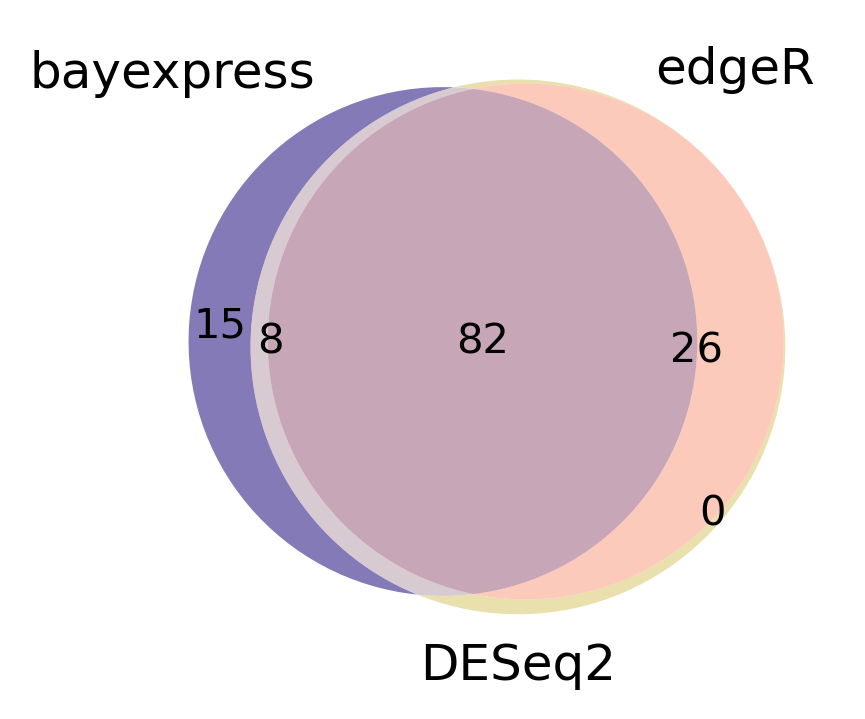

In [34]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles

# Coloring for Colorblindness: https://davidmathlogic.com/colorblind/#%23332288-%23117733-%2344AA99-%2388CCEE-%23DDCC77-%23CC6677-%23AA4499-%23882255


plt.figure(figsize=(3,3), dpi=300)


v = venn3([set(RALL.loc[(RALL.FC2_bayexpress == True)].locus_name),    
                set(RALL.loc[(RALL.FC2_edgeR == True)].locus_name),    
                set(RALL.loc[(RALL.FC2_DESeq2 == True)].locus_name)], 
                set_labels = ('bayexpress', 'edgeR', 'DESeq2'),set_colors=("#332288", "#882255", '#DDCC77'), alpha=0.6)

venn3_circles([set(RALL.loc[(RALL.FC2_bayexpress == True)].locus_name),    
                set(RALL.loc[(RALL.FC2_edgeR == True)].locus_name),    
                set(RALL.loc[(RALL.FC2_DESeq2 == True)].locus_name)],  
                linestyle="-", linewidth=0.0) 


plt.show()

# exported for paper as FC2.png

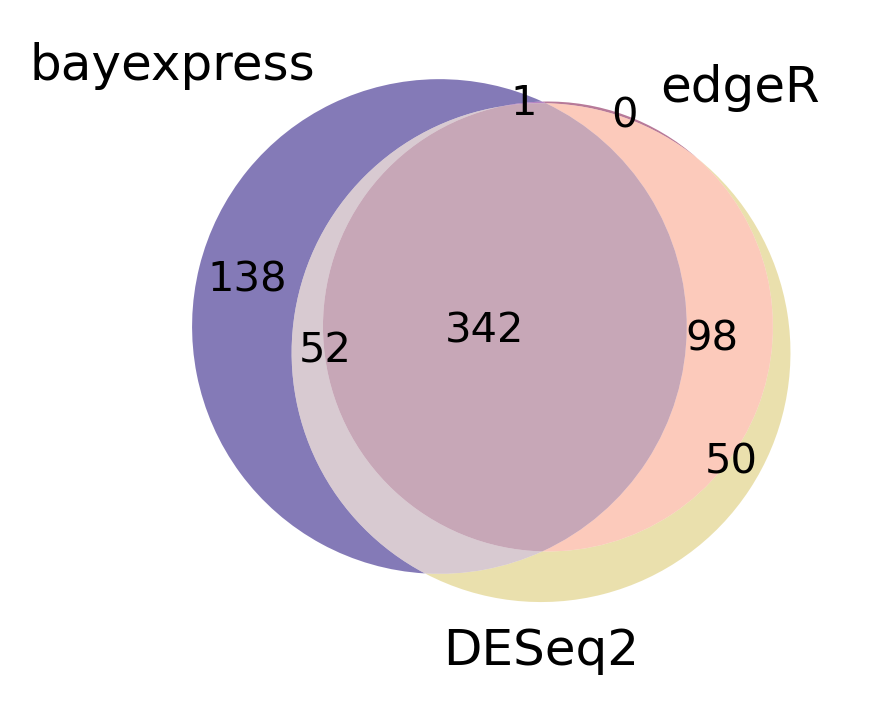

In [35]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles

# Coloring for Colorblindness: https://davidmathlogic.com/colorblind/#%23332288-%23117733-%2344AA99-%2388CCEE-%23DDCC77-%23CC6677-%23AA4499-%23882255

plt.figure(figsize=(3,3), dpi=300)


v = venn3([set(RALL.loc[(RALL.FC1_bayexpress == True)].locus_name),    
                set(RALL.loc[(RALL.FC1_edgeR == True)].locus_name),    
                set(RALL.loc[(RALL.FC1_DESeq2 == True)].locus_name)], 
                set_labels = ('bayexpress', 'edgeR', 'DESeq2'),set_colors=("#332288", "#882255", '#DDCC77'), alpha=0.6)

venn3_circles([set(RALL.loc[(RALL.FC1_bayexpress == True)].locus_name),    
                set(RALL.loc[(RALL.FC1_edgeR == True)].locus_name),    
                set(RALL.loc[(RALL.FC1_DESeq2 == True)].locus_name)],  
                linestyle="-", linewidth=0.0) 


plt.show()
# exported for paper as FC1.png

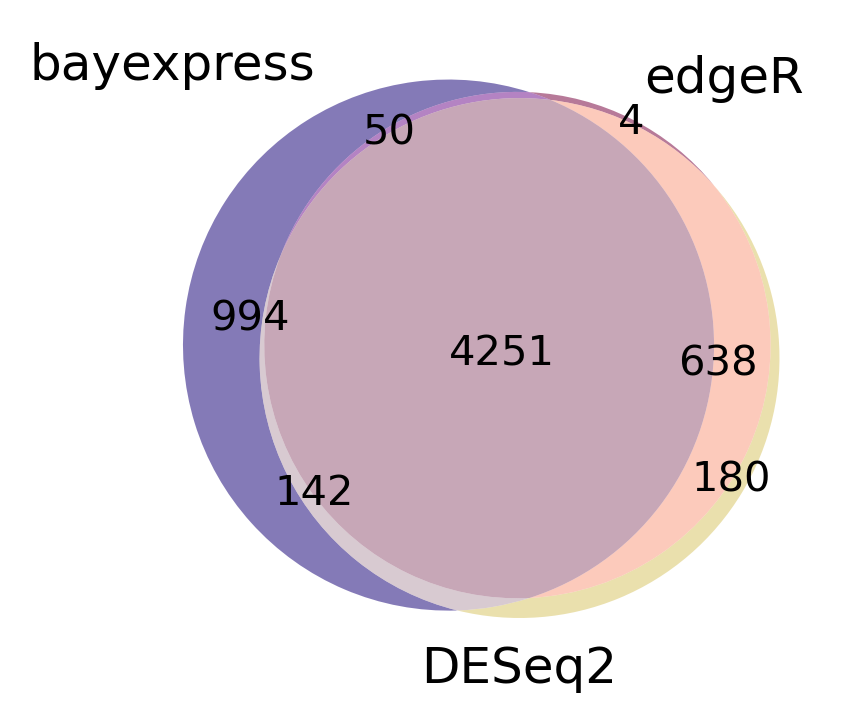

In [36]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles

# Coloring for Colorblindness: https://davidmathlogic.com/colorblind/#%23332288-%23117733-%2344AA99-%2388CCEE-%23DDCC77-%23CC6677-%23AA4499-%23882255

plt.figure(figsize=(3,3), dpi=300)


v = venn3([set(RALL.loc[(RALL.FC0_bayexpress == True)].locus_name),    
                set(RALL.loc[(RALL.FC0_edgeR == True)].locus_name),    
                set(RALL.loc[(RALL.FC0_DESeq2 == True)].locus_name)], 
                set_labels = ('bayexpress', 'edgeR', 'DESeq2'),set_colors=("#332288", "#882255", '#DDCC77'), alpha=0.6)

venn3_circles([set(RALL.loc[(RALL.FC0_bayexpress == True)].locus_name),    
                set(RALL.loc[(RALL.FC0_edgeR == True)].locus_name),    
                set(RALL.loc[(RALL.FC0_DESeq2 == True)].locus_name)],  
                linestyle="-", linewidth=0.0) 


plt.show()
# exported for paper as FC0.png

In [37]:
# Which ones are positive in bayexpress but not the other 2?
# DEG = 'statistically significant change' & | log2 fold change | > 2

display(counts_RALL.loc[list(RALL.loc[(RALL.FC2_bayexpress == True) & (RALL.FC2_edgeR != True) & (RALL.FC2_DESeq2 != True)].locus_name)])


,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,
YCL048W,10,17,15,27,20,28,14,13,21,15,...,134,73,128,57,83,92,77,71,103,61
YFL058W,19,16,15,19,14,32,16,28,11,11,...,141,93,129,71,85,99,82,76,95,50
YGL034C,5,16,2,6,6,13,5,4,7,12,...,88,34,31,19,42,43,16,32,55,30
YHR007C-A,10,19,19,18,17,53,14,9,18,16,...,158,86,88,74,91,105,74,89,111,100
YIR017C,1,3,0,3,0,0,0,2,0,0,...,10,5,5,1,4,2,5,4,8,12
YJL077C,83,79,95,150,99,169,89,114,81,102,...,806,451,621,364,580,494,487,471,485,419
YJR078W,35,40,30,87,35,55,33,47,51,25,...,335,172,284,143,183,193,156,166,209,180
YJR095W,10,12,8,9,10,21,14,13,12,8,...,65,50,56,29,57,64,42,44,57,42
YKR039W,425,291,377,467,291,567,327,491,319,352,...,3425,1834,2151,1277,1558,1882,1227,1570,1832,1126


In [38]:
# Which ones are positive in DESeq2 and edgeR but not bayexpress?
# DEG = 'statistically significant change' & | log2 fold change | > 2

display(counts_RALL.loc[list(RALL.loc[(RALL.FC2_bayexpress != True) & (RALL.FC2_edgeR == True) & (RALL.FC2_DESeq2 == True)].locus_name)])


,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,
YAL061W,2114,1725,1485,3013,1544,2846,1915,2976,2486,1792,...,944,526,805,489,662,575,511,491,557,443
YBL005W-B,1399,1894,1487,2379,2024,4398,2416,2406,1700,2192,...,1139,564,618,475,596,612,528,610,616,449
YBR012W-B,1150,1603,1288,1986,1670,3471,1924,1957,1431,1753,...,1022,530,570,417,493,516,415,539,569,441
YDR055W,1837,1867,2279,3938,1706,3432,2472,2531,2330,1755,...,1206,645,866,559,837,833,589,632,749,592
YDR098C-B,1426,1832,1345,2217,1814,3911,2307,2452,1793,2058,...,1034,546,655,469,551,604,513,597,639,479
YDR210C-D,1428,1911,1399,2331,1848,4059,2355,2454,1891,2123,...,1085,617,638,526,646,600,531,637,579,496
YDR406W,1481,2075,2077,2401,1787,4019,1931,2751,2230,2312,...,1223,598,734,479,717,740,589,653,759,479
YER160C,1405,1875,1408,2214,1922,4009,2354,2503,1747,2110,...,1037,606,568,445,549,540,414,553,532,382
YFR053C,9685,5001,11321,14364,4351,8942,5786,14325,8574,5428,...,5706,3325,5086,2118,2695,3890,1867,1791,3242,1333


Text(0, 0.5, 'log2 fold change (DESeq2)')

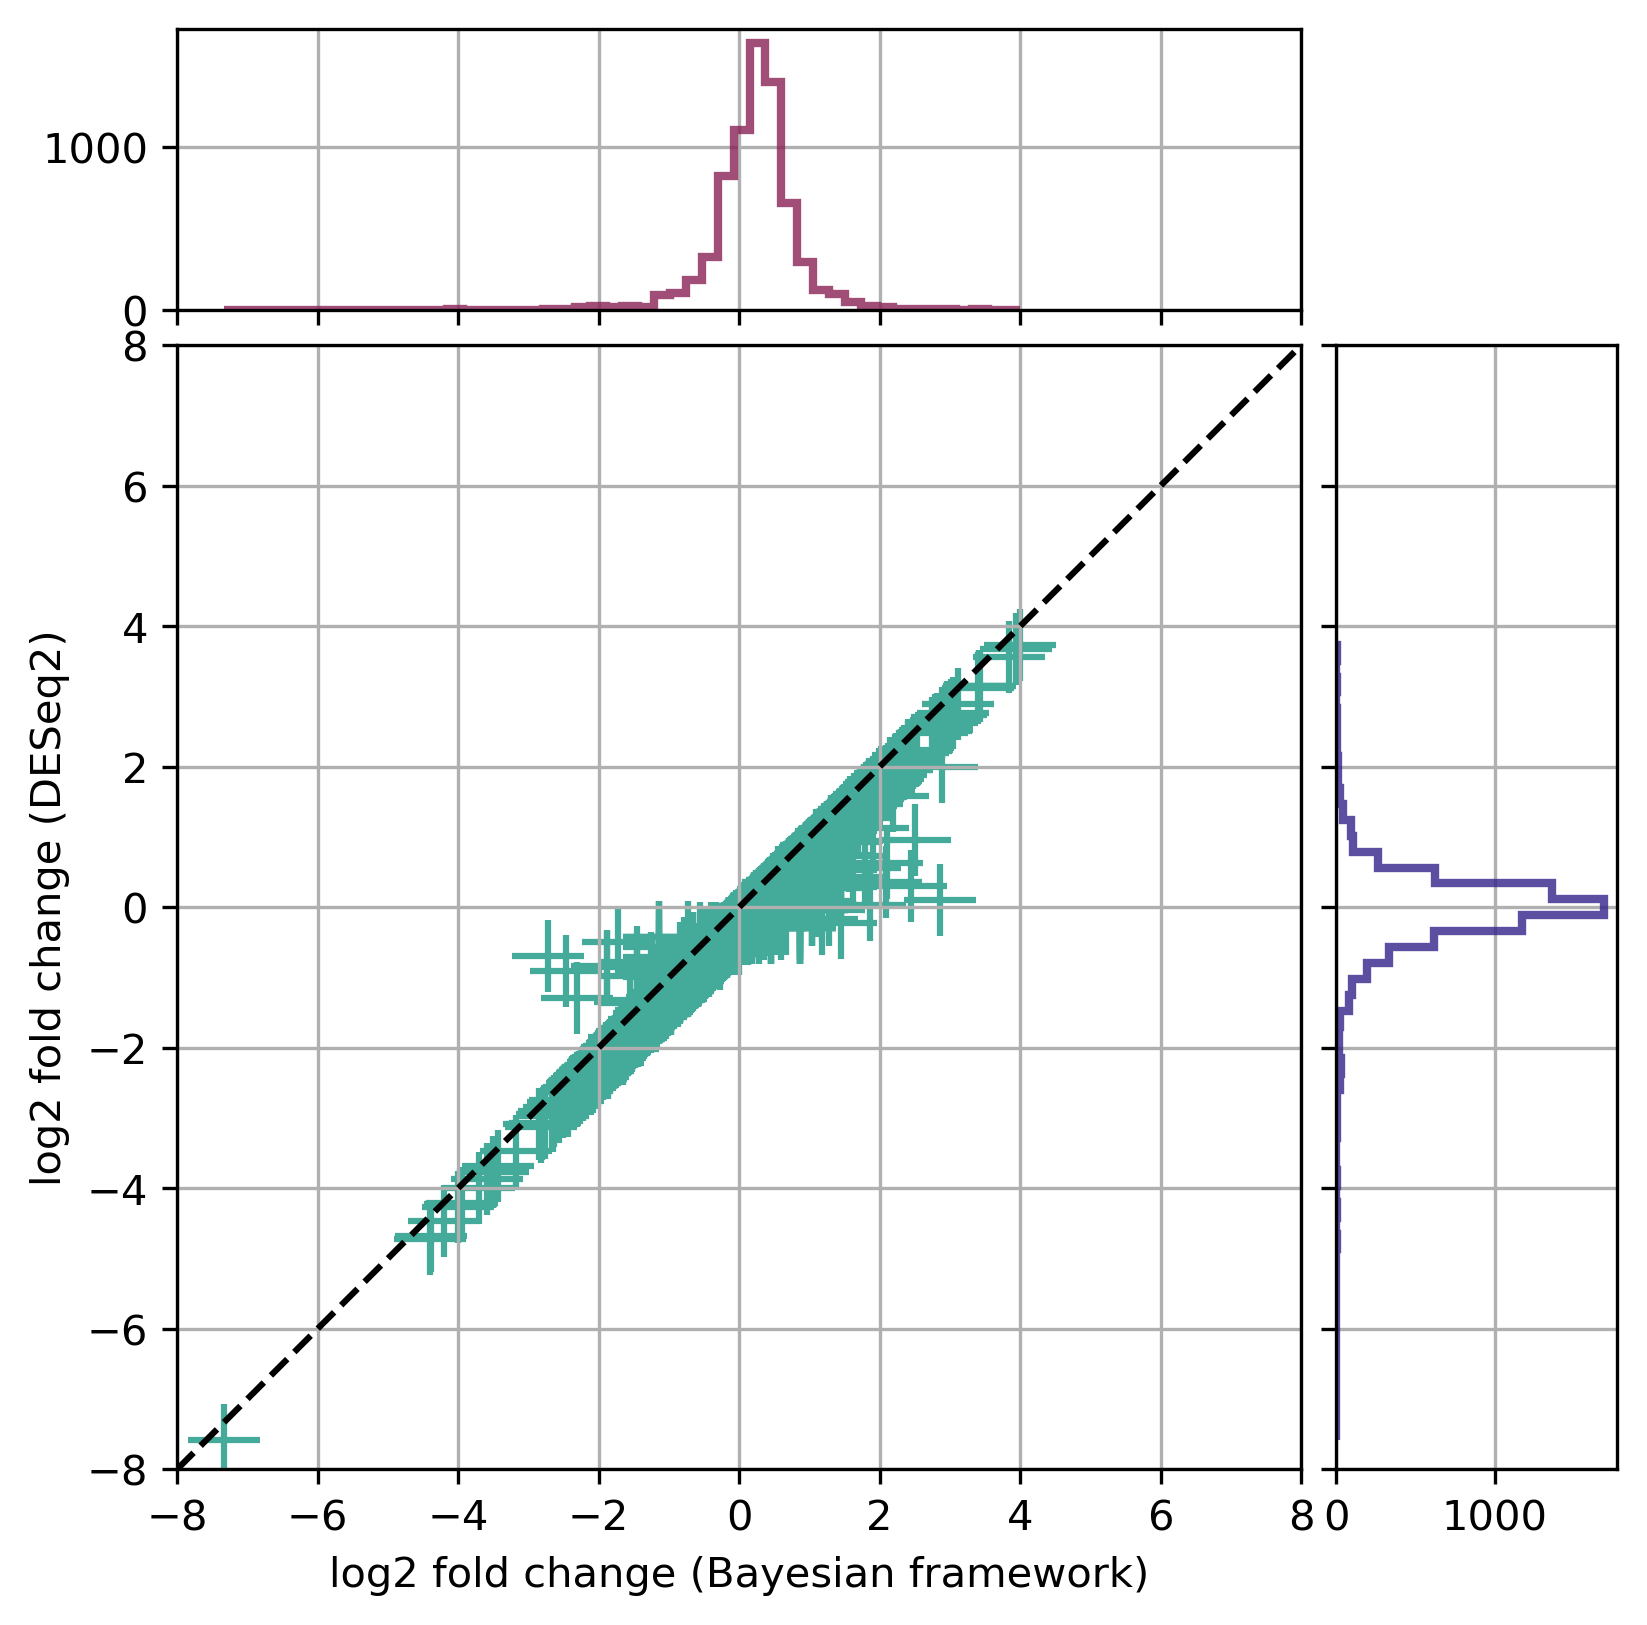

In [39]:
# FC = bayexpress
# logFC = edgeR
# log2FoldChange = DESeq2


fig = plt.figure(figsize=(6, 6), dpi=300)


gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)


ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

ax.grid()
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)

# the scatter plot:
ax.scatter(RALL.FC, RALL.log2FoldChange, c='#44AA99', s=300,
alpha=1, marker='+')

# now determine nice limits by hand:

ax_histx.hist(RALL.FC, 
              
              bins=50, histtype='step', color='#882255', alpha=0.8, linewidth=2, orientation='vertical')

ax_histy.hist(RALL.log2FoldChange, 
              
              bins=50, histtype='step', color='#332288', alpha=0.8, linewidth=2, orientation='horizontal')

# Add a diagonal line
ax.plot([-8, 8], [-8, 8], ls='--', c='black')  # Draws a diagonal line from (-8, -8) to (8, 8)

ax_histx.grid()
ax_histy.grid()

ax.set_xlabel('log2 fold change (Bayesian framework)')
ax.set_ylabel('log2 fold change (DESeq2)')


In [40]:
RALL.iloc[counts_RALL.reset_index().index[(counts_RALL > 0).all(axis=1)].tolist()]

,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,BF_21,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,PValue,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange,pvalue
1,21S_rRNA,False,False,False,0.147177,-1.302642,False,False,False,-0.187417,5.227208e-01,False,False,False,-0.243675,4.000494e-01
3,ICR1,True,False,False,0.504048,76.746125,True,False,False,0.238044,1.313037e-09,True,False,False,0.229845,3.867198e-11
4,LSR1,False,False,False,0.120243,0.451012,False,False,False,-0.191748,2.362411e-01,False,False,False,-0.214104,1.874278e-01
5,NME1,False,False,False,0.325530,-0.117540,False,False,False,0.051107,7.059294e-01,False,False,False,0.029891,8.237241e-01
11,Q0050,False,False,False,0.372953,-3.832185,NaN,NaN,NaN,NaN,NaN,False,False,False,-0.007422,9.815936e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6821,snR83,False,False,False,-0.049198,-5.961317,True,False,False,-0.305331,1.107774e-02,True,False,False,-0.306221,1.178781e-02
6822,snR84,True,False,False,0.289726,14.487733,False,False,False,0.028065,6.264292e-01,False,False,False,0.021053,7.125521e-01
6823,snR85,True,False,False,-0.526487,8.618953,True,False,False,-0.794987,1.287467e-10,True,False,False,-0.812711,1.851697e-13
6824,snR86,True,False,False,0.372995,272.275536,False,False,False,0.099378,6.209823e-02,False,False,False,0.090857,8.209612e-02


Text(0, 0.5, 'log2 fold change (DESeq2)')

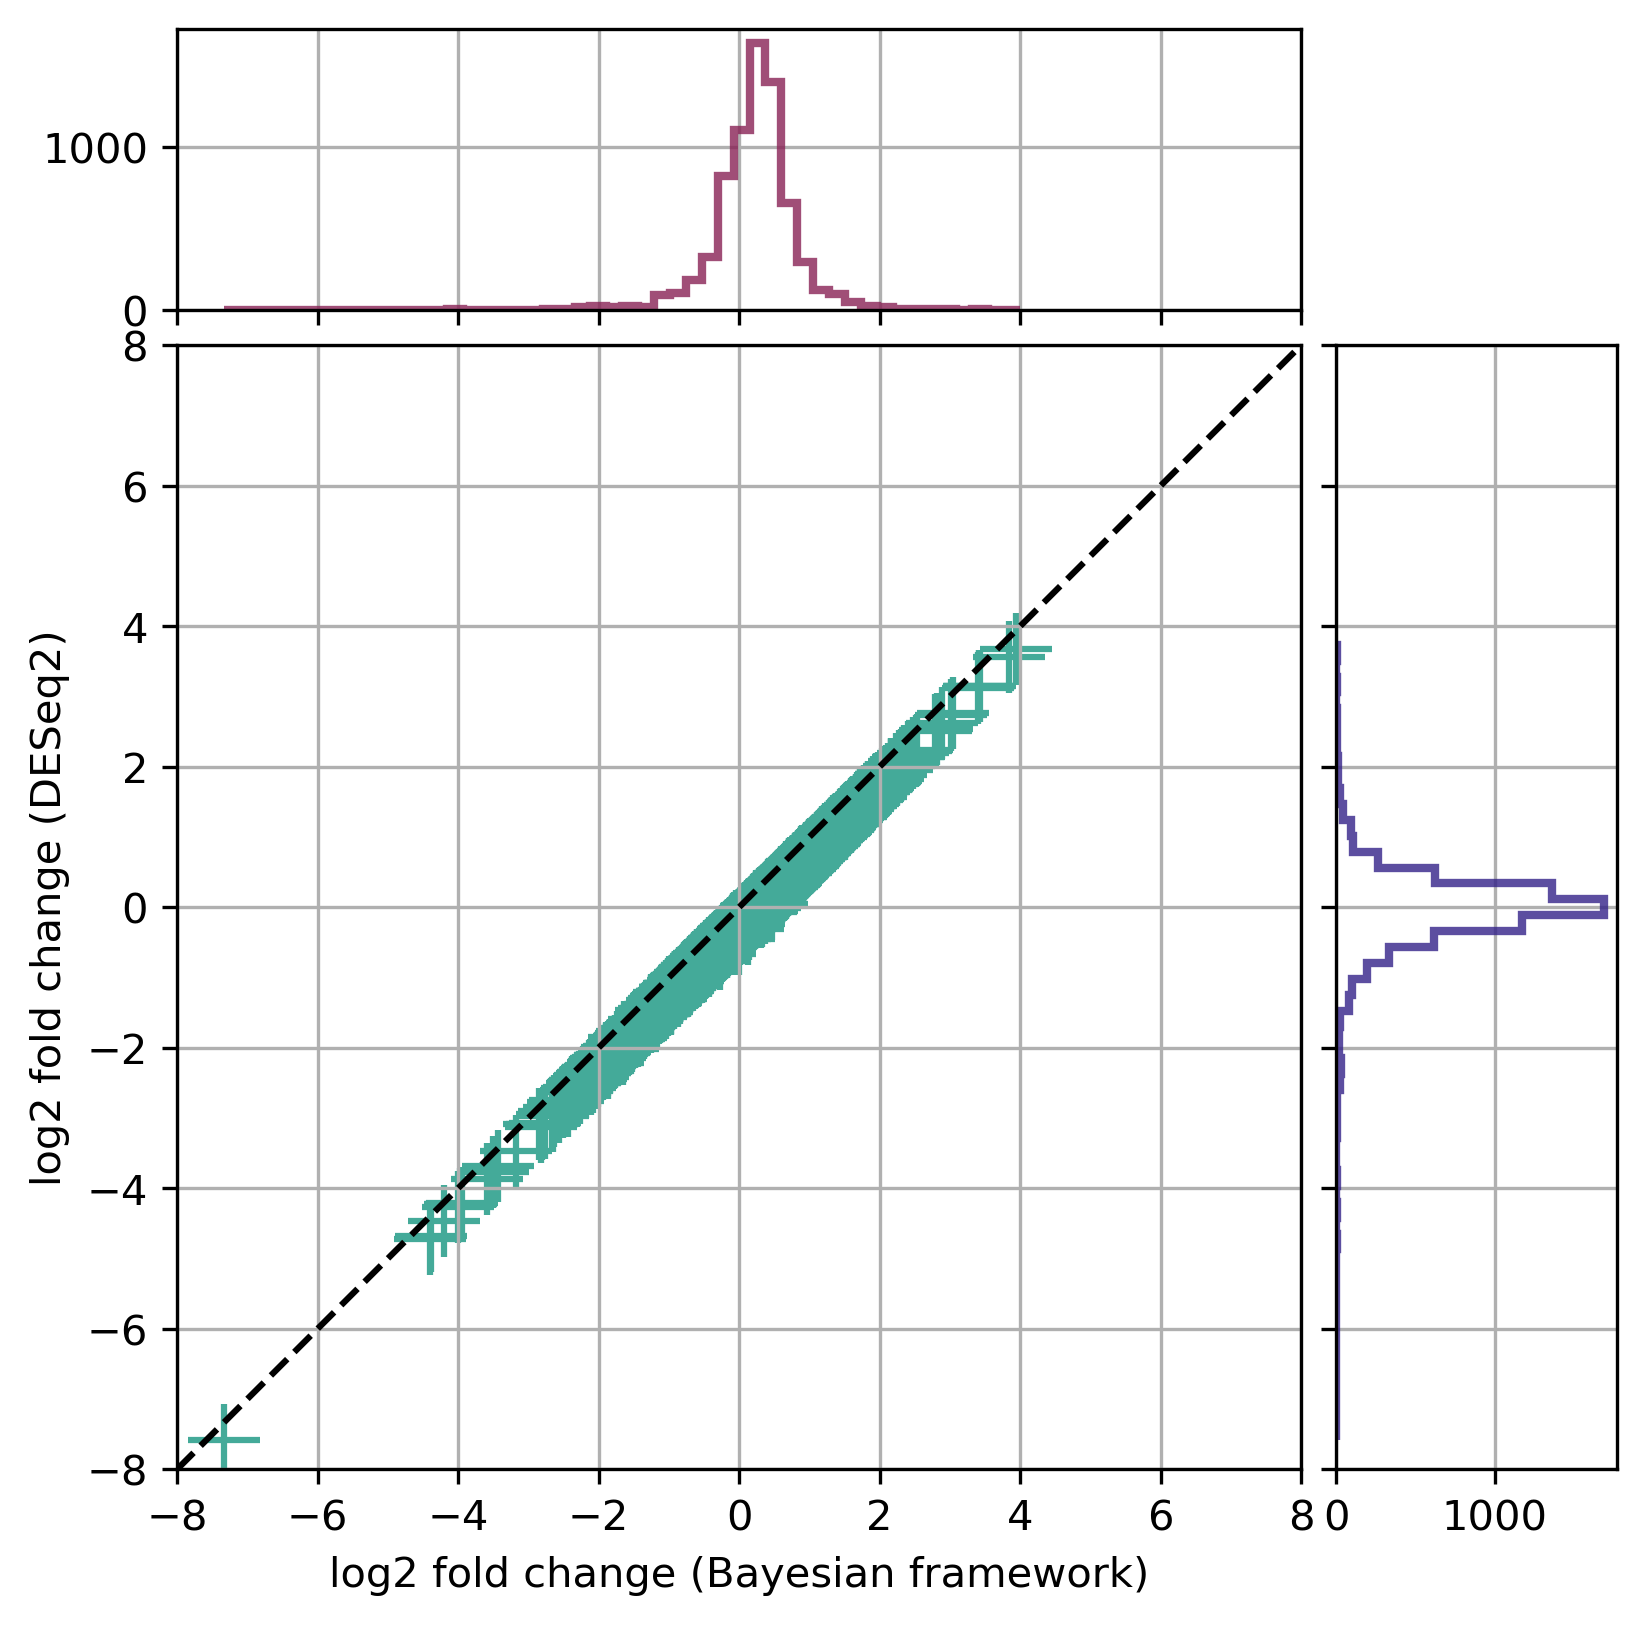

In [41]:
# Let's check if the non-diagonal points are n = 0 genes
# Here we filter out all genes where at least one replicate has 0 reads mapping to the gene

# FC = bayexpress
# logFC = edgeR
# log2FoldChange = DESeq2


fig = plt.figure(figsize=(6, 6), dpi=300)


gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)


ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

ax.grid()
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)

# the scatter plot:
ax.scatter(RALL.iloc[counts_RALL.reset_index().index[(counts_RALL > 0).all(axis=1)].tolist()].FC, RALL.iloc[counts_RALL.reset_index().index[(counts_RALL > 0).all(axis=1)].tolist()].log2FoldChange, c='#44AA99', s=300,
alpha=1, marker='+')

# now determine nice limits by hand:

ax_histx.hist(RALL.FC, 
              
              bins=50, histtype='step', color='#882255', alpha=0.8, linewidth=2, orientation='vertical')

ax_histy.hist(RALL.log2FoldChange, 
              
              bins=50, histtype='step', color='#332288', alpha=0.8, linewidth=2, orientation='horizontal')

# Add a diagonal line
ax.plot([-8, 8], [-8, 8], ls='--', c='black')  # Draws a diagonal line from (-8, -8) to (8, 8)

ax_histx.grid()
ax_histy.grid()

ax.set_xlabel('log2 fold change (Bayesian framework)')
ax.set_ylabel('log2 fold change (DESeq2)')

Text(0, 0.5, 'log2 fold change (edgeR)')

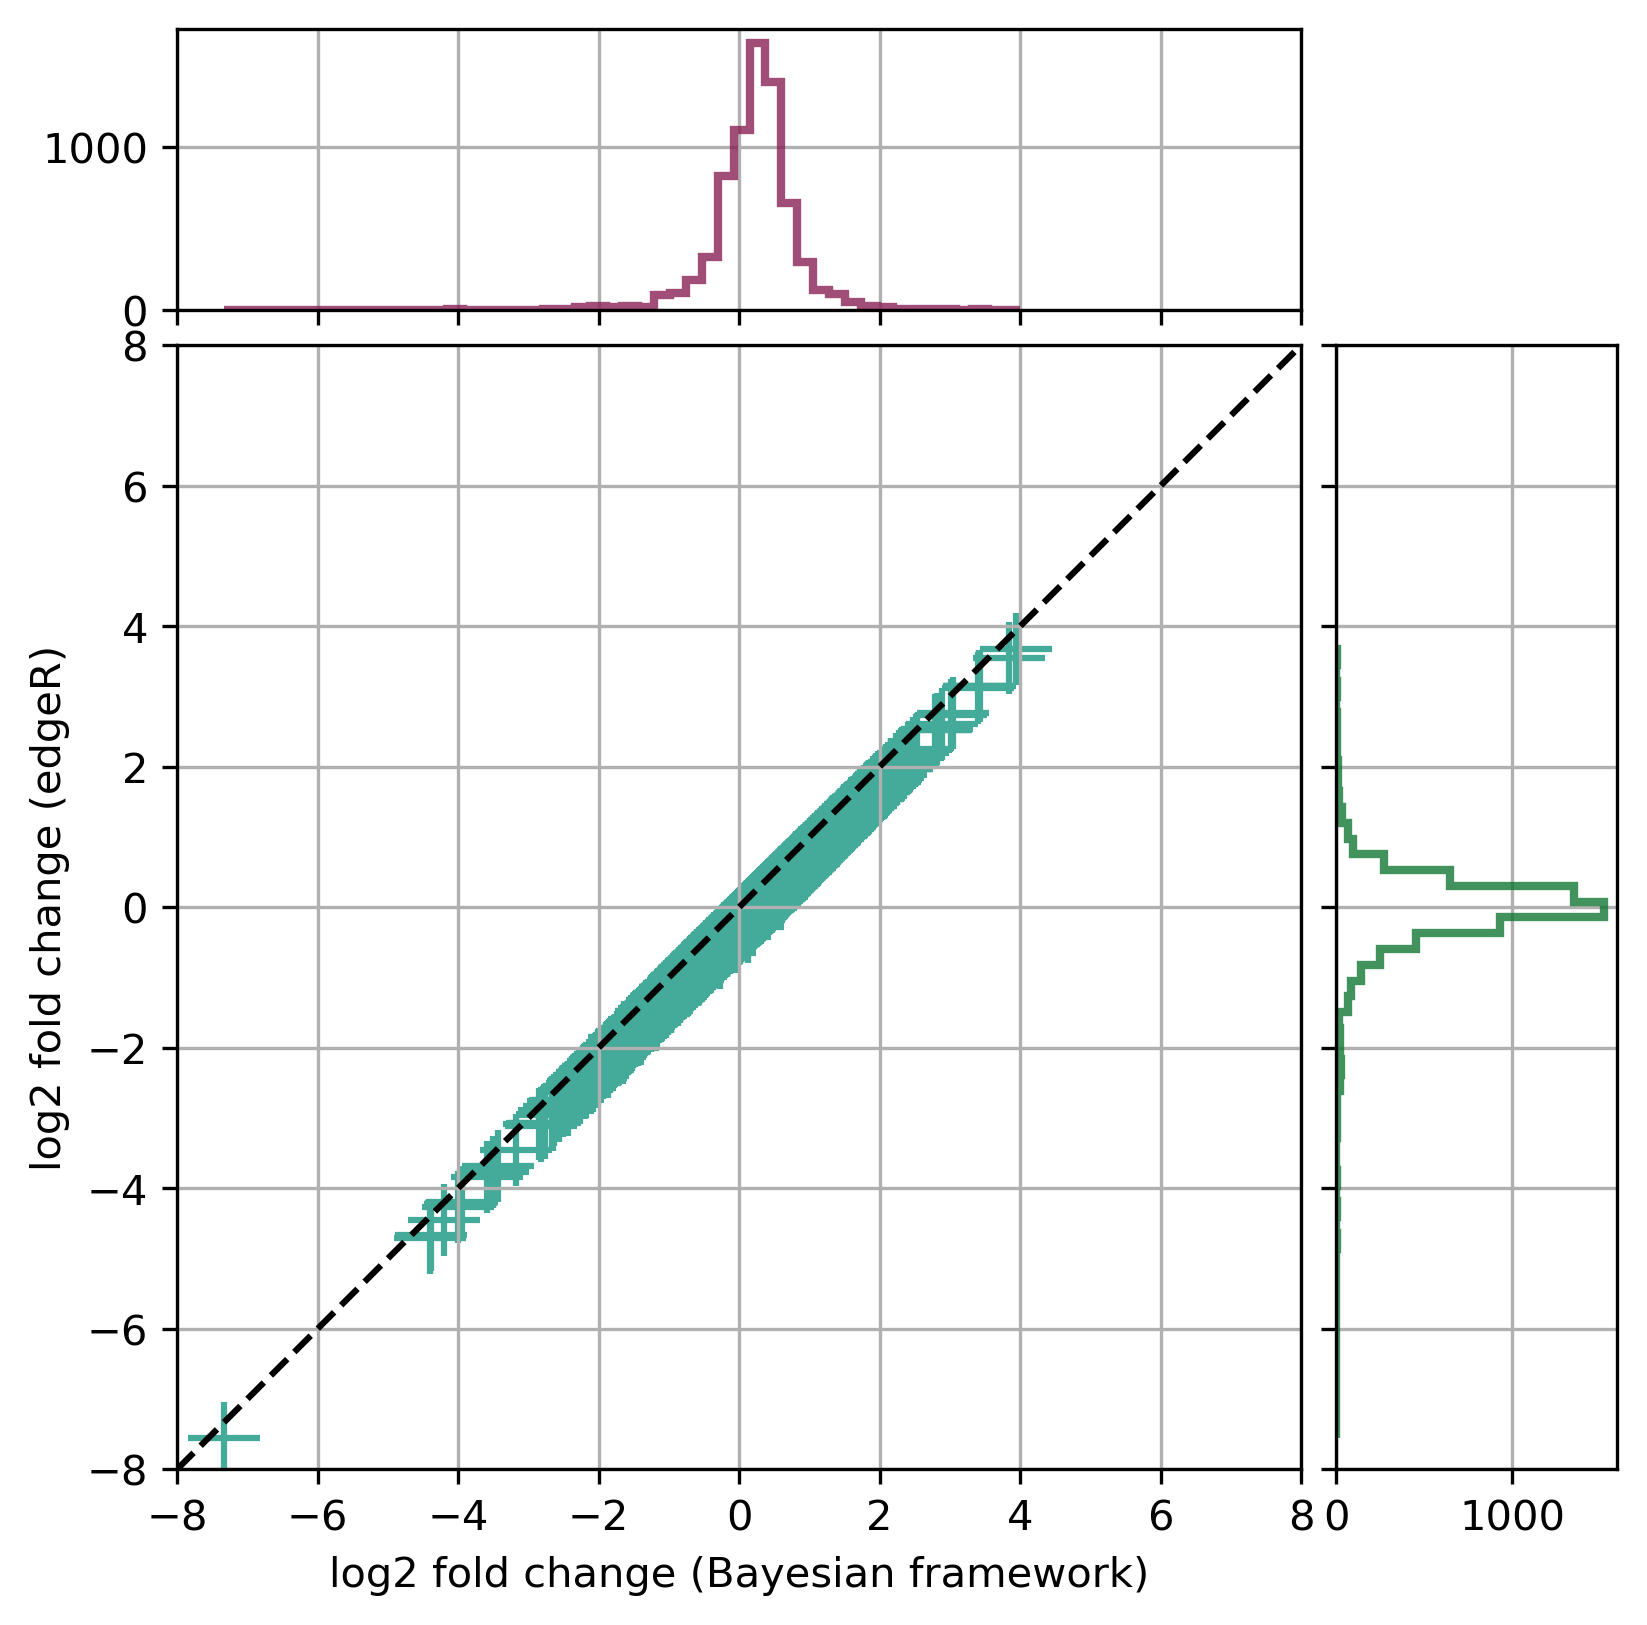

In [42]:
# FC = bayexpress
# logFC = edgeR
# log2FoldChange = DESeq2


fig = plt.figure(figsize=(6, 6), dpi=300)


gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)


ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

ax.grid()
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)

# the scatter plot:
ax.scatter(RALL.FC, RALL.logFC, c='#44AA99', s=300,
alpha=1, marker='+')

# now determine nice limits by hand:

ax_histx.hist(RALL.FC, 
              
              bins=50, histtype='step', color='#882255', alpha=0.8, linewidth=2, orientation='vertical')

ax_histy.hist(RALL.logFC, 
              
              bins=50, histtype='step', color='#117733', alpha=0.8, linewidth=2, orientation='horizontal')

# Add a diagonal line
ax.plot([-8, 8], [-8, 8], ls='--', c='black')  # Draws a diagonal line from (-8, -8) to (8, 8)

ax_histx.grid()
ax_histy.grid()

ax.set_xlabel('log2 fold change (Bayesian framework)')
ax.set_ylabel('log2 fold change (edgeR)')


Text(0, 0.5, 'log2 fold change (edgeR)')

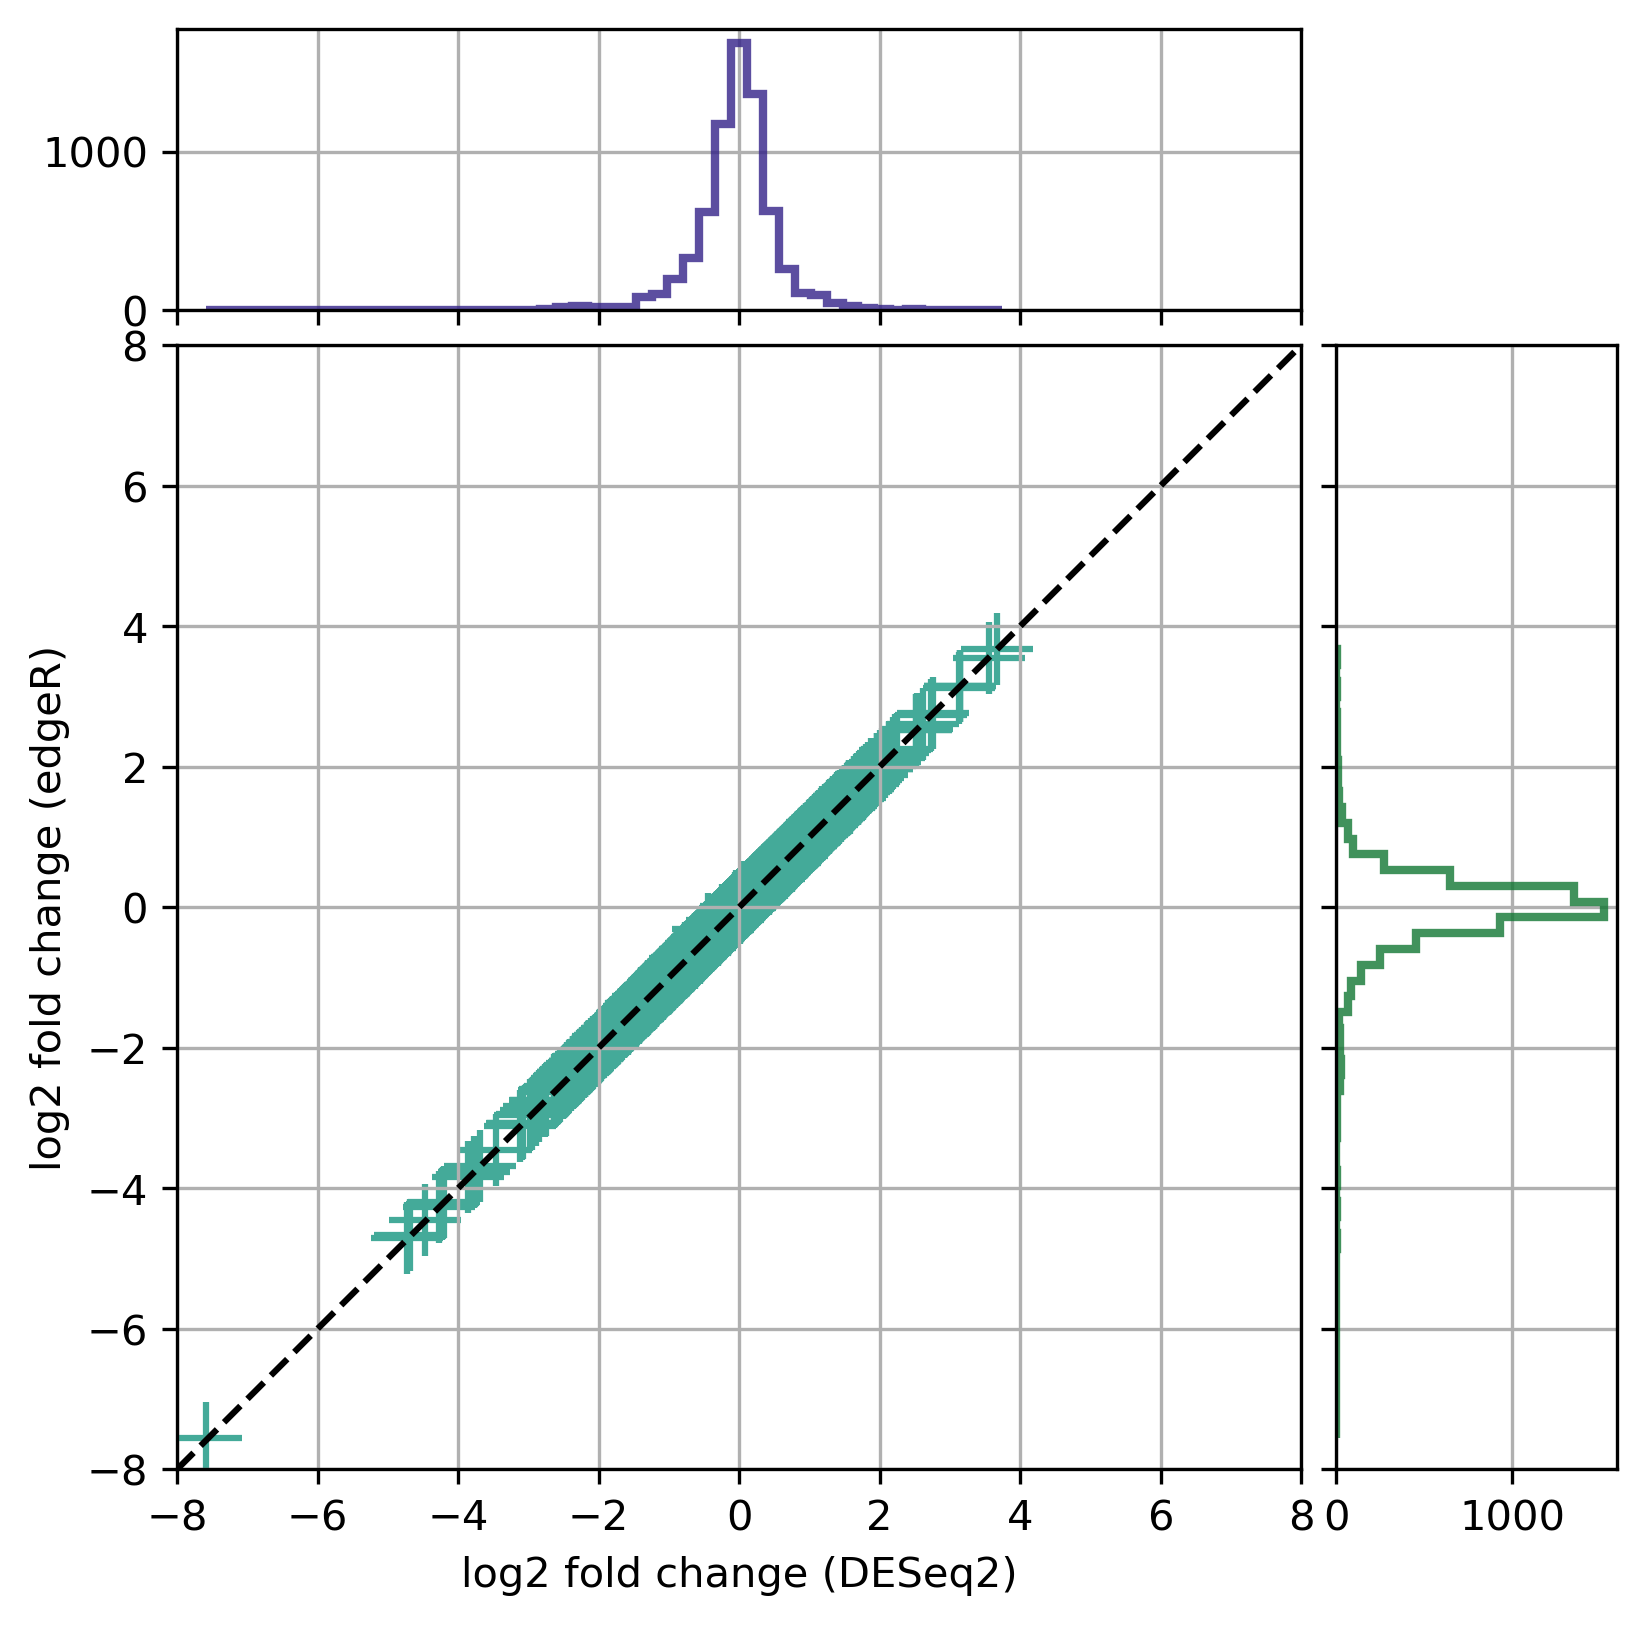

In [43]:
# FC = bayexpress
# logFC = edgeR
# log2FoldChange = DESeq2


fig = plt.figure(figsize=(6, 6), dpi=300)


gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)


ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

ax.grid()
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)

# the scatter plot:
ax.scatter(RALL.log2FoldChange, RALL.logFC, c='#44AA99', s=300, alpha=1, marker='+')

# now determine nice limits by hand:

ax_histx.hist(RALL.log2FoldChange, 
              
              bins=50, histtype='step', color='#332288', alpha=0.8, linewidth=2, orientation='vertical')

ax_histy.hist(RALL.logFC, 
              
              bins=50, histtype='step', color='#117733', alpha=0.8, linewidth=2, orientation='horizontal')

# Add a diagonal line
ax.plot([-8, 8], [-8, 8], ls='--', c='black')  # Draws a diagonal line from (-8, -8) to (8, 8) 

ax_histx.grid()
ax_histy.grid()

ax.set_xlabel('log2 fold change (DESeq2)')
ax.set_ylabel('log2 fold change (edgeR)')


In [44]:
# Checking the ones where the fold change doesn't match

display(RALL.loc[((RALL.FC - RALL.log2FoldChange) > 0.5)])

counts_RALL.loc[list(RALL.loc[((RALL.FC - RALL.log2FoldChange) > 0.5)].locus_name)]

# Hah, okay that's Laplace?

# And no deviation with edgeR is explained as they filter out genes with zeros


,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,BF_21,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,PValue,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange,pvalue
15,Q0070,False,False,False,0.446801,-7.867053,NaN,NaN,NaN,NaN,NaN,False,False,False,-0.295268,0.919442
23,Q0120,False,False,False,1.446801,-6.087297,NaN,NaN,NaN,NaN,NaN,False,False,False,0.525250,0.399487
32,Q0255,False,False,False,1.861839,-6.889361,NaN,NaN,NaN,NaN,NaN,False,False,False,0.032621,0.985137
139,YAL066W,False,False,False,1.084231,-6.572985,NaN,NaN,NaN,NaN,NaN,False,False,False,0.403601,0.465601
660,YCL018W,False,False,False,0.861839,-7.992988,NaN,NaN,NaN,NaN,NaN,False,False,False,-0.292145,0.920291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7083,tT(CGU)K,False,False,False,1.031764,-7.278376,NaN,NaN,NaN,NaN,NaN,False,False,False,-0.039199,0.971306
7118,tY(GUA)F1,False,False,False,0.627373,-7.191358,NaN,NaN,NaN,NaN,NaN,False,False,False,0.073552,0.901125
7120,tY(GUA)J1,False,False,False,0.861839,-7.312143,NaN,NaN,NaN,NaN,NaN,False,False,False,-0.042322,0.968574
7121,tY(GUA)J2,False,False,False,0.861839,-7.312143,NaN,NaN,NaN,NaN,NaN,False,False,False,-0.042322,0.966261


,1,2,3,4,5,6,7,8,9,10,...,35.1,36.1,37.1,38.1,39.1,40.1,41.1,42.1,43,44
genes,,,,,,,,,,,,,,,,,,,,,
Q0070,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Q0120,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,2,1,1,0,0,0
Q0255,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
YAL066W,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,2
YCL018W,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tT(CGU)K,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
tY(GUA)F1,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
tY(GUA)J1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,2,0,0,0,0


In [45]:
RALL

,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,BF_21,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,PValue,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange,pvalue
0,15S_rRNA,False,False,False,0.274047,-3.710645,NaN,NaN,NaN,NaN,NaN,False,False,False,-0.136618,6.884290e-01
1,21S_rRNA,False,False,False,0.147177,-1.302642,False,False,False,-0.187417,5.227208e-01,False,False,False,-0.243675,4.000494e-01
2,HRA1,False,False,False,-0.564787,-5.206545,NaN,NaN,NaN,NaN,NaN,True,False,False,-0.851126,2.217160e-04
3,ICR1,True,False,False,0.504048,76.746125,True,False,False,0.238044,1.313037e-09,True,False,False,0.229845,3.867198e-11
4,LSR1,False,False,False,0.120243,0.451012,False,False,False,-0.191748,2.362411e-01,False,False,False,-0.214104,1.874278e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,False,False,False,0.861839,-7.312143,NaN,NaN,NaN,NaN,NaN,False,False,False,-0.042322,9.662608e-01
7122,tY(GUA)M1,False,False,False,0.022303,-7.406574,NaN,NaN,NaN,NaN,NaN,False,False,False,-0.273708,5.756379e-01
7123,tY(GUA)M2,False,False,False,0.183767,-7.727890,NaN,NaN,NaN,NaN,NaN,False,False,False,-0.301508,8.326090e-01
7124,tY(GUA)O,False,False,False,0.347266,-7.622253,NaN,NaN,NaN,NaN,NaN,False,False,False,-0.239053,8.377597e-01


In [46]:
# I want to see genes with very low iFC and high Bayes factors 

RALL.loc[(abs(RALL.FC) < 0.5) & (RALL.BF_21 > 100)]


,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,BF_21,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,PValue,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange,pvalue
60,TLC1,True,False,False,0.472738,777.763124,True,False,False,0.214960,7.336652e-07,True,False,False,0.207530,1.993147e-07
65,YAL005C,True,False,False,-0.467587,5690.406648,True,False,False,-0.741578,3.011683e-22,True,False,False,-0.750480,5.241511e-38
67,YAL008W,True,False,False,0.497346,250.062832,True,False,False,0.214127,7.479194e-06,True,False,False,0.204919,6.581914e-06
69,YAL010C,True,False,False,0.371459,102.398044,True,False,False,0.098595,3.825835e-03,True,False,False,0.091394,5.018610e-03
77,YAL016W,True,False,False,0.251155,238.457053,False,False,False,-0.014612,3.189342e-01,False,False,False,-0.023240,8.118954e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6720,YPR180W,True,False,False,0.387641,142.309221,True,False,False,0.112273,1.431549e-06,True,False,False,0.106842,2.448931e-06
6723,YPR183W,True,False,False,0.137083,118.978170,True,False,False,-0.138434,2.931828e-02,True,False,False,-0.148399,2.023078e-02
6725,YPR185W,True,False,False,0.389119,231.518592,True,False,False,0.116372,1.466941e-04,True,False,False,0.108488,2.343314e-04
6731,YPR191W,True,False,False,0.279871,218.989419,False,False,False,-0.011166,8.170362e-01,False,False,False,-0.021050,6.666824e-01


In [47]:
# I want to see genes with very low Bayes factors and high inferred fold change

display(RALL.loc[(abs(RALL.FC) > 2) & (RALL.BF_21 < 1)])

print(list(RALL.loc[(abs(RALL.FC) > 2) & (RALL.BF_21 < 1)].locus_name))


# very very low read numbers for those genes

,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,BF_21,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,PValue,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange,pvalue
2155,YFR057W,False,False,False,2.109766,-5.377420,NaN,NaN,NaN,NaN,NaN,False,False,False,0.627912,0.340045
2708,YGR259C,False,False,False,-2.308086,-5.008936,NaN,NaN,NaN,NaN,NaN,False,False,False,-1.292982,0.054945
4008,YKR040C,False,False,False,2.505695,-4.035301,NaN,NaN,NaN,NaN,NaN,False,False,False,0.956304,0.121998
5175,YMR324C,False,False,False,2.183767,-1.644232,NaN,NaN,NaN,NaN,NaN,True,True,False,1.586147,0.000128
5580,YNR042W,False,False,False,2.861839,-6.308594,NaN,NaN,NaN,NaN,NaN,False,False,False,0.101321,0.950017
6671,YPR142C,False,False,False,-2.723124,-6.662105,NaN,NaN,NaN,NaN,NaN,False,False,False,-0.701215,0.698301
6831,tA(AGC)J,False,False,False,2.084231,-6.000743,NaN,NaN,NaN,NaN,NaN,False,False,False,0.354470,0.682455
6836,tA(AGC)M2,False,False,False,2.446801,-5.942522,NaN,NaN,NaN,NaN,NaN,False,False,False,0.296452,0.783353
6981,tL(UAG)J,False,False,False,-2.460089,-6.092080,NaN,NaN,NaN,NaN,NaN,False,False,False,-0.903812,0.440543


['YFR057W', 'YGR259C', 'YKR040C', 'YMR324C', 'YNR042W', 'YPR142C', 'tA(AGC)J', 'tA(AGC)M2', 'tL(UAG)J']


Text(0, 0.5, 'Bayes factor')

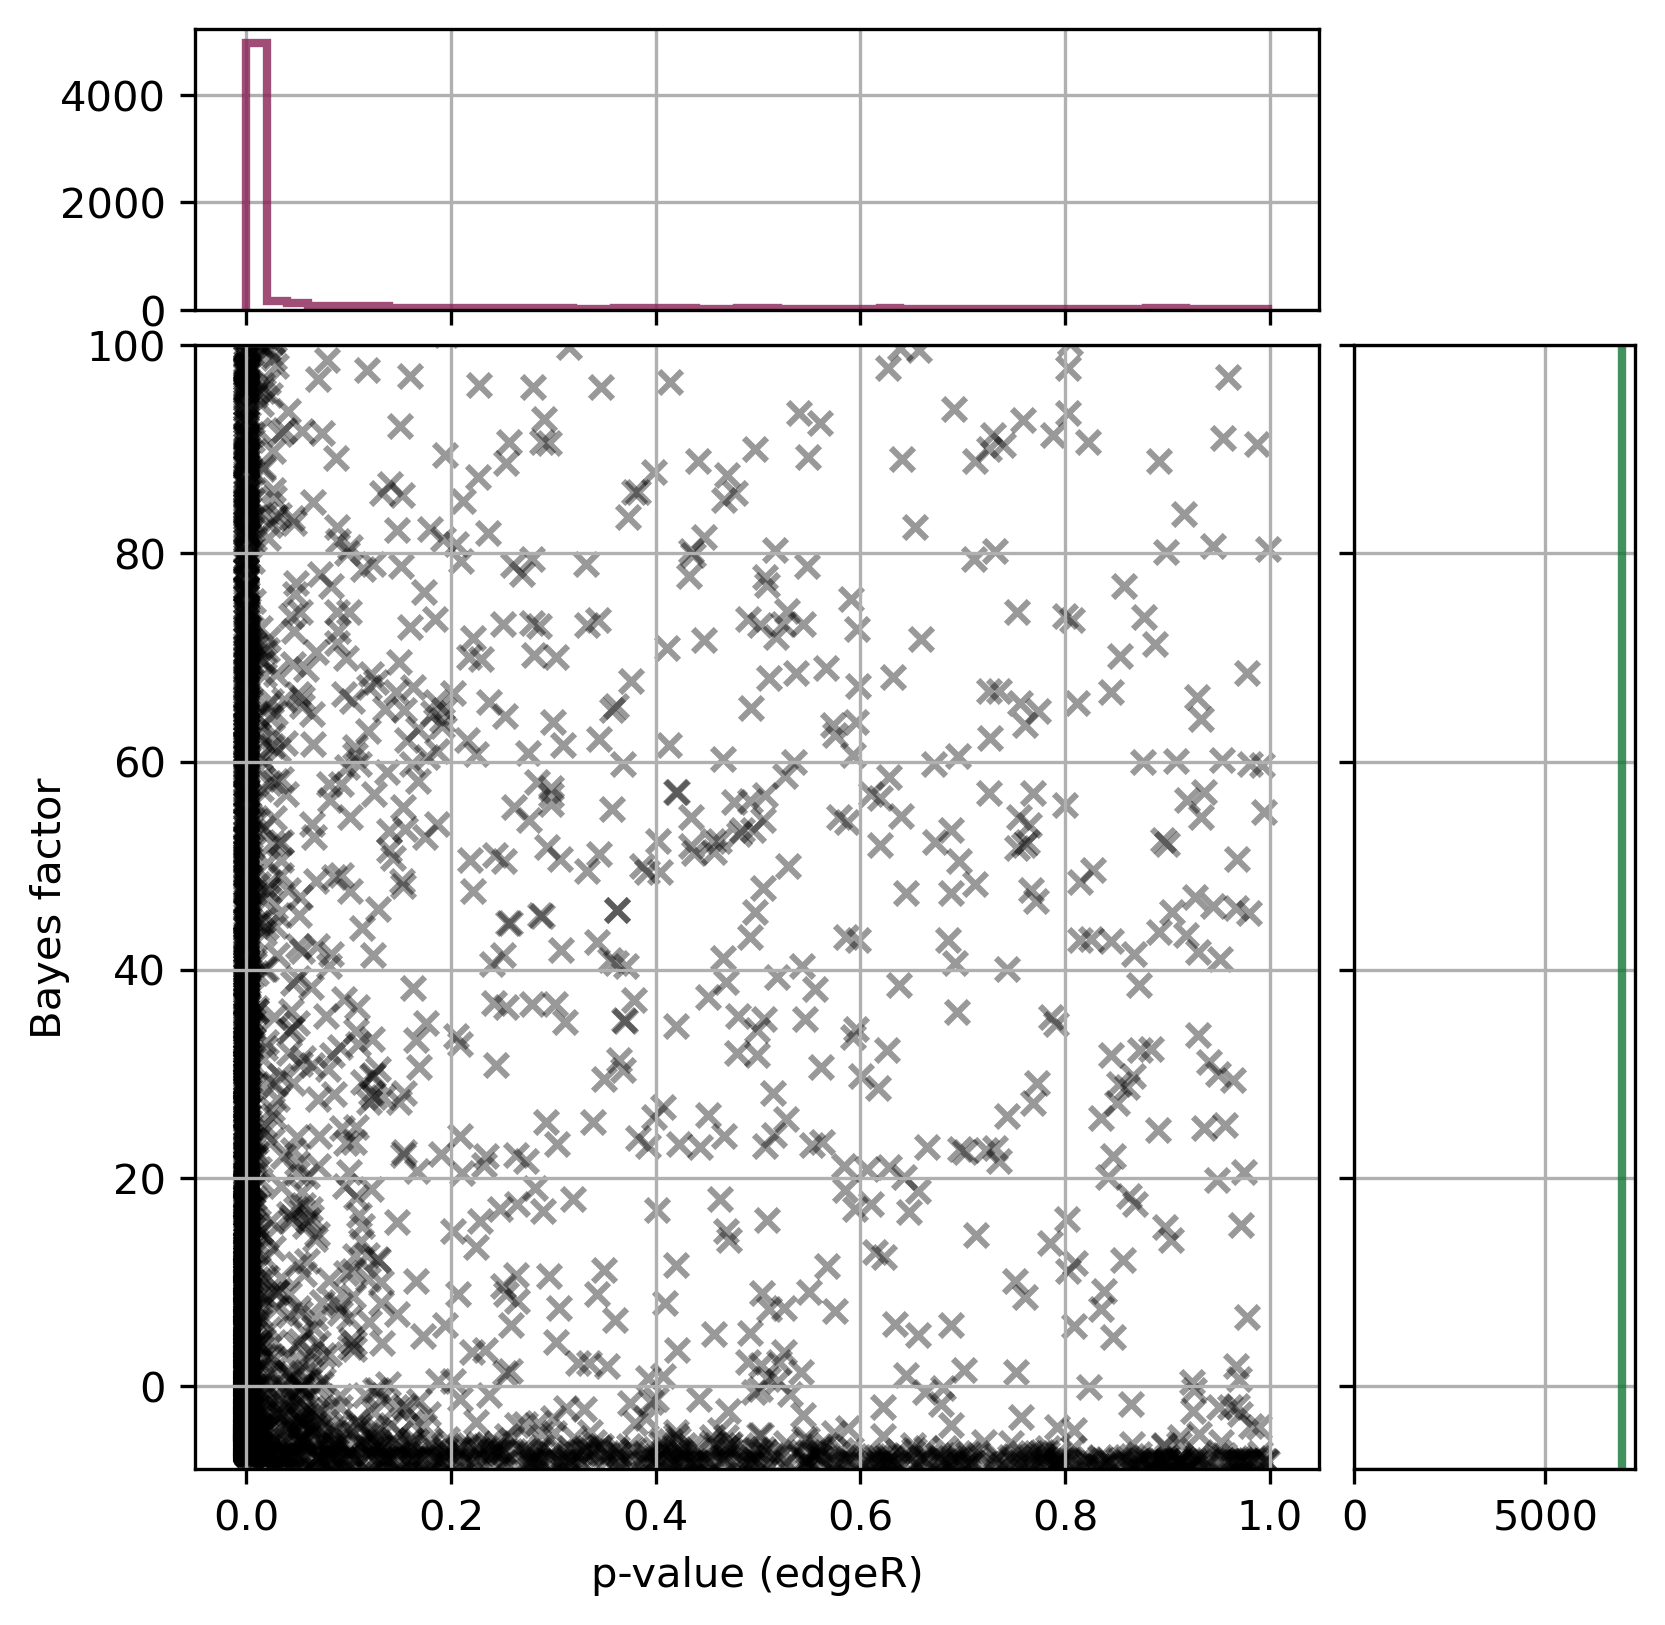

In [48]:
# P-vlaues (DESeq2) vs. Bayes factors

fig = plt.figure(figsize=(6, 6), dpi=300)


gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)


ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

ax.grid()
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# ax.set_xlim(-8, 100)
ax.set_ylim(-8, 100)

# the scatter plot:
ax.scatter(RALL.pvalue, RALL.BF_21, c='black', s=30,
alpha=0.4, marker='x')

# now determine nice limits by hand:

ax_histx.hist(RALL.pvalue, 
              
              bins=50, histtype='step', color='#882255', alpha=0.8, linewidth=2, orientation='vertical')

ax_histy.hist(RALL.BF_21, 
              
              bins=50, histtype='step', color='#117733', alpha=0.8, linewidth=2, orientation='horizontal')

ax_histx.grid()
ax_histy.grid()

ax.set_xlabel('p-value (edgeR)')
ax.set_ylabel('Bayes factor')


Text(0, 0.5, 'Bayes factor')

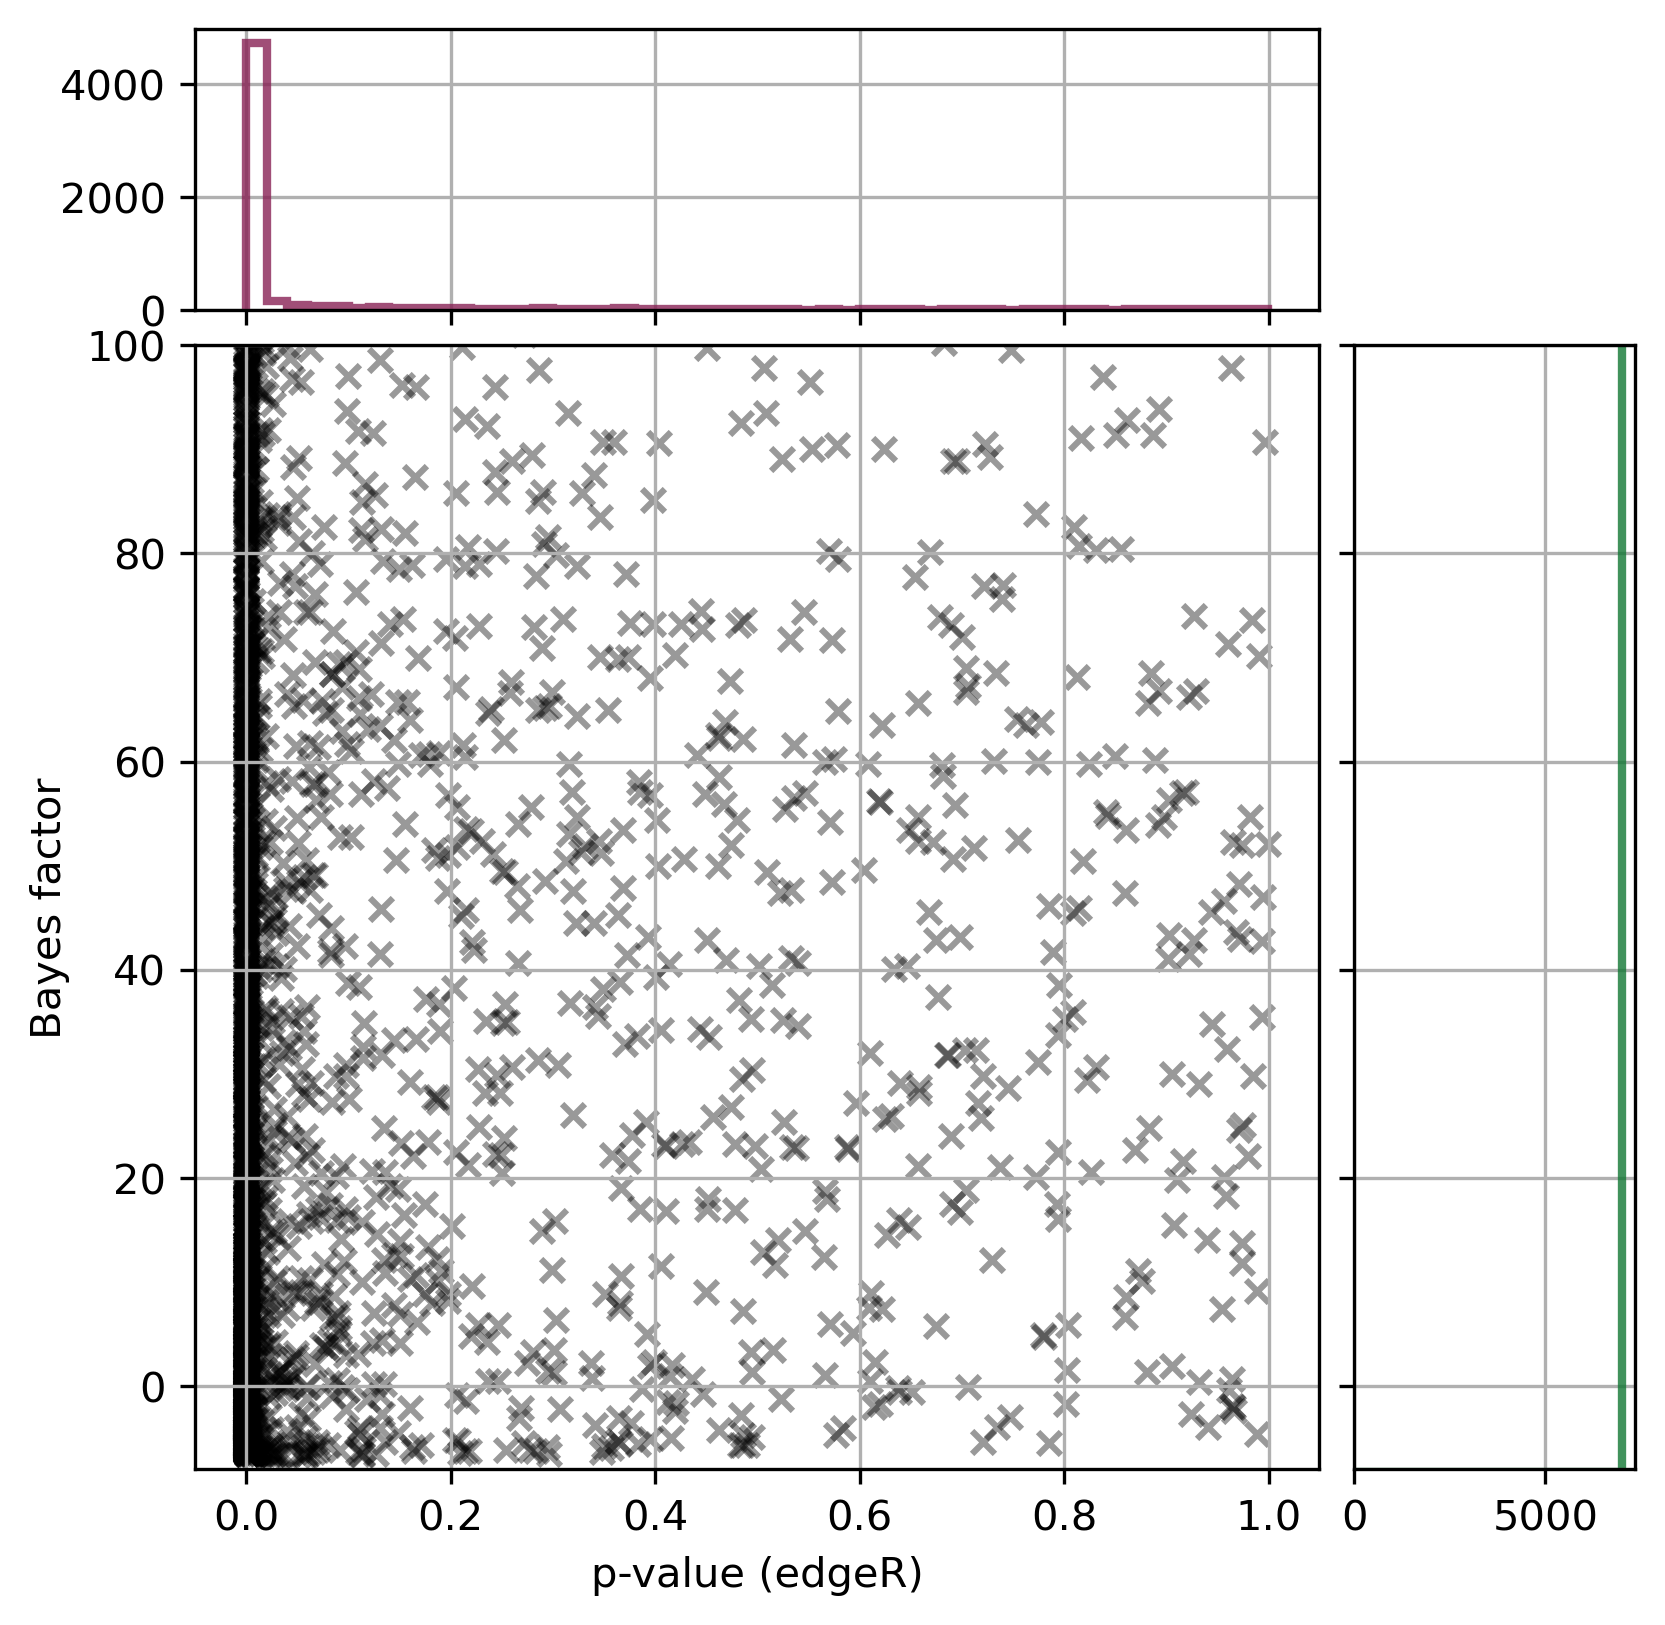

In [49]:
# P-vlaues (edgeR) vs. Bayes factors

fig = plt.figure(figsize=(6, 6), dpi=300)


gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)


ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

ax.grid()
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# ax.set_xlim(-8, 100)
ax.set_ylim(-8, 100)

# the scatter plot:
ax.scatter(RALL.PValue, RALL.BF_21, c='black', s=30,
alpha=0.4, marker='x')

# now determine nice limits by hand:

ax_histx.hist(RALL.PValue, 
              
              bins=50, histtype='step', color='#882255', alpha=0.8, linewidth=2, orientation='vertical')

ax_histy.hist(RALL.BF_21, 
              
              bins=50, histtype='step', color='#117733', alpha=0.8, linewidth=2, orientation='horizontal')

ax_histx.grid()
ax_histy.grid()

ax.set_xlabel('p-value (edgeR)')
ax.set_ylabel('Bayes factor')


Text(0, 0.5, 'p-value (edgeR)')

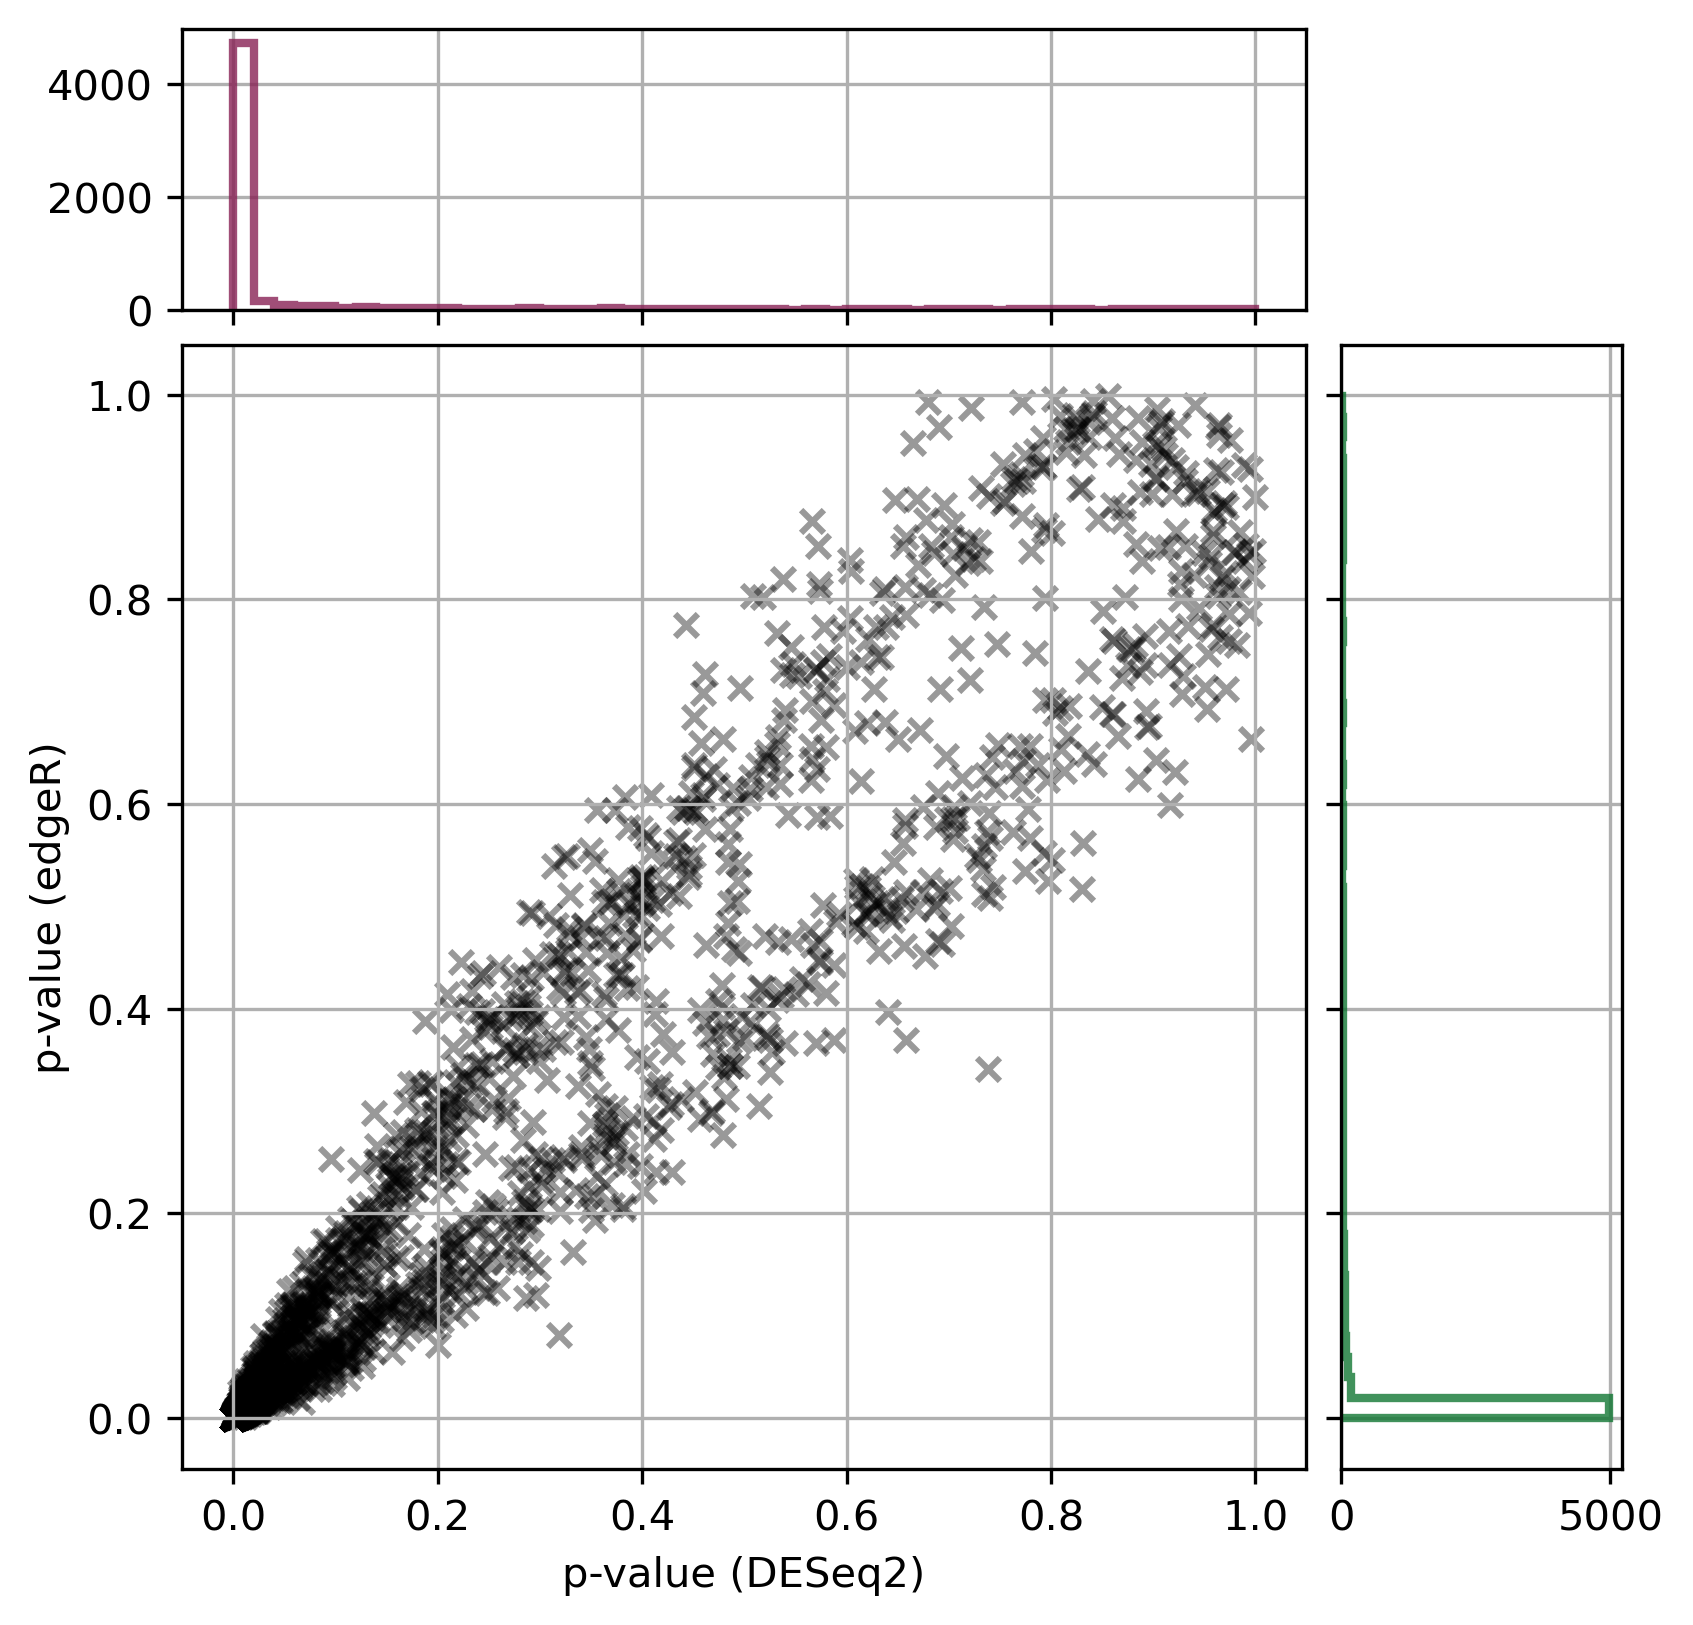

In [50]:
# P-vlaues (edgeR) vs. p-value (DESeq2)

fig = plt.figure(figsize=(6, 6), dpi=300)


gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)


ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

ax.grid()
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# ax.set_xlim(-8, 100)
# ax.set_ylim(-8, 100)

# the scatter plot:
ax.scatter(RALL.PValue, RALL.pvalue, c='black', s=30,
alpha=0.4, marker='x')

# now determine nice limits by hand:

ax_histx.hist(RALL.PValue, 
              
              bins=50, histtype='step', color='#882255', alpha=0.8, linewidth=2, orientation='vertical')

ax_histy.hist(RALL.pvalue, 
              
              bins=50, histtype='step', color='#117733', alpha=0.8, linewidth=2, orientation='horizontal')

ax_histx.grid()
ax_histy.grid()

ax.set_xlabel('p-value (DESeq2)')
ax.set_ylabel('p-value (edgeR)')


In [51]:
# I want to see genes with very high Bayes factors and high p-values

display(RALL.loc[(abs(RALL.pvalue) > 0.7) & (RALL.BF_21 > 100)])

print(list(RALL.loc[(abs(RALL.pvalue) > 0.7) & (RALL.BF_21 > 100)].locus_name))


,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,BF_21,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,PValue,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange,pvalue
159,YAR027W,True,False,False,0.254461,125.622354,False,False,False,-0.013130,0.835886,False,False,False,-0.022031,0.730559
233,YBL045C,True,False,False,0.286243,349.290125,False,False,False,-0.003538,0.925648,False,False,False,-0.012577,0.744650
245,YBL057C,True,False,False,0.264508,137.348935,False,False,False,-0.007696,0.874983,False,False,False,-0.016934,0.736382
373,YBR058C,True,False,False,0.274552,124.300217,False,False,False,0.016231,0.443357,False,False,False,0.005928,0.775429
604,YBR265W,True,False,False,0.284088,215.949484,False,False,False,0.015948,0.682719,False,False,False,0.007486,0.852033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6363,YPL135W,True,False,False,0.294913,161.353537,False,False,False,0.015294,0.739023,False,False,False,0.005826,0.901121
6426,YPL195W,True,False,False,0.270908,133.261952,False,False,False,0.012587,0.827795,False,False,False,0.006664,0.908017
6469,YPL237W,True,False,False,0.258232,334.326220,False,False,False,-0.002904,0.934119,False,False,False,-0.010075,0.773825
6562,YPR037C,True,False,False,0.268815,117.783455,False,False,False,-0.005441,0.939669,False,False,False,-0.016235,0.824139


['YAR027W', 'YBL045C', 'YBL057C', 'YBR058C', 'YBR265W', 'YBR276C', 'YCL009C', 'YCR009C', 'YCR028C-A', 'YCR059C', 'YCR091W', 'YDL078C', 'YDL110C', 'YDL125C', 'YDL126C', 'YDL189W', 'YDL195W', 'YDL231C', 'YDR028C', 'YDR141C', 'YDR168W', 'YDR196C', 'YDR207C', 'YDR226W', 'YDR276C', 'YDR387C', 'YDR434W', 'YDR487C', 'YEL032W', 'YEL056W', 'YER019W', 'YER148W', 'YFL005W', 'YGL006W', 'YGL022W', 'YGR019W', 'YGR023W', 'YGR134W', 'YGR136W', 'YGR146C', 'YGR198W', 'YGR205W', 'YGR248W', 'YHR009C', 'YHR135C', 'YIL125W', 'YJL001W', 'YJL129C', 'YJL151C', 'YJR125C', 'YKL039W', 'YKL064W', 'YKL192C', 'YKR016W', 'YKR066C', 'YKR067W', 'YLL015W', 'YLR028C', 'YLR065C', 'YLR114C', 'YLR253W', 'YLR268W', 'YLR305C', 'YLR367W', 'YML072C', 'YML088W', 'YML117W', 'YMR010W', 'YMR197C', 'YMR202W', 'YMR219W', 'YNL180C', 'YNL268W', 'YNL293W', 'YNR013C', 'YOR138C', 'YOR246C', 'YPL055C', 'YPL111W', 'YPL135W', 'YPL195W', 'YPL237W', 'YPR037C', 'YPR165W']


## RANK BASED COMPARISON

In [52]:
def calc_rbo(ranked_list_1, ranked_list_2, p):
    try:
        assert 0 < p < 1
    except AssertionError:
        return f"p = {p}, p should be (0,1)."
   
    try:
        assert len(ranked_list_2) > 0 and len(ranked_list_1) > 0
    except AssertionError:
        return f"Error: Empty list supplied [{len(ranked_list_1)}, {len(ranked_list_2)}]"
   
    # dertermine the corresponding shorter and longer lists
    short_list, long_list = (ranked_list_1, ranked_list_2) if len(ranked_list_1) < len(ranked_list_2) else (ranked_list_2, ranked_list_1)
    short_list_len, long_list_len = len(short_list), len(long_list) # s, l
    # from 0 to len(longer_list) calculate intersections
    short_list_set = set()
    long_list_set = set()   
    intersections = {}
    for i in range(long_list_len):
        long_list_set.add(long_list[i])
        if i < short_list_len:
            short_list_set.add(short_list[i])
        intersections[i+1] = float(len(short_list_set.intersection(long_list_set))) # {d: X_{d}}
   
    # term 1
    # \sum_{d=1}^{l} (X_{d}/d)*p^{d}
    # d = i+1, bc python indexing from 0
    term_1 = sum(intersections[i+1]/(i+1)*pow(p,(i+1)) for i in range(long_list_len))
   
    # term 2
    # \sum_{d=s+1}^{l} ((X_{s}(d-s)/sd)*p^{d})
    Xs = intersections[short_list_len]
    Xl = intersections[long_list_len]
    term_2 = sum(((Xs * ( (i+1) - short_list_len)) / (short_list_len*(i+1)) * pow(p, (i+1) )) for i in range(short_list_len, long_list_len))
 
    # term 3
    # [(X_{l} - X_{s}) / l + X_{s} / s] * p^{l}
    term_3 = ((Xl - Xs) / (long_list_len) + (Xs) / (short_list_len) ) * pow(p, long_list_len)
 
    # RBO = ((1-p)/p)*(term_1 +term_2) + term_3
    return ((1-p)/p)*(term_1 +term_2) + term_3

In [53]:
RALL['abs_iFC'] = abs(RALL.FC.to_numpy())
RALL['abs_FC_edgeR'] = abs(RALL.logFC.to_numpy())
RALL['abs_FC_DESeq2'] = abs(RALL.log2FoldChange.to_numpy())


In [54]:
RBO_index_L = [ 'BF_21',
                'FC_edgeR',
                'p_edgeR',
                'FC_DESeq2',
                'p_DESeq2',
                'FC_edgeR',
                'p_edgeR',
                'FC_DESeq2',
                'p_DESeq2',
                'p_edgeR',
                'FC_DESeq2',
                'p_DESeq2',
                'FC_DESeq2',
                'p_DESeq2',
                'p_DESeq2' ]

RBO_index_R = ['iFC',
               'iFC',
               'iFC',
               'iFC',
               'iFC',
               'BF_21',
               'BF_21',
               'BF_21',
               'BF_21',
               'FC_edgeR',
               'FC_edgeR',
               'FC_edgeR',
               'p_edgeR',
               'p_edgeR',
               'FC_DESeq2']

In [55]:
p = 0.1

RBO_1 = []

RBO_1.append(calc_rbo(RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_1.append(calc_rbo(RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_1.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_1.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_1.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))

RBO_1.append(calc_rbo(RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_1.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_1.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_1.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))

RBO_1.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))
RBO_1.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))
RBO_1.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))

RBO_1.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), p))
RBO_1.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), p))

RBO_1.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), p))

RBO_data = pd.DataFrame({'<': RBO_index_L, f'{p}': RBO_1, '>': RBO_index_R})

RBO_data.sort_values(by=f'{p}')


,<,0.1,>
8,p_DESeq2,9.908446e-11,BF_21
13,p_DESeq2,1.409205e-07,p_edgeR
4,p_DESeq2,1.409205e-07,iFC
14,p_DESeq2,1.410194e-07,FC_DESeq2
11,p_DESeq2,1.420195e-07,FC_edgeR
0,BF_21,1.640920e-06,iFC
7,FC_DESeq2,1.640929e-06,BF_21
5,FC_edgeR,1.640929e-06,BF_21
6,p_edgeR,1.653279e-06,BF_21
2,p_edgeR,3.266076e-03,iFC


In [56]:
p = 0.2

RBO_2 = []

RBO_2.append(calc_rbo(RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_2.append(calc_rbo(RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_2.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_2.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_2.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))

RBO_2.append(calc_rbo(RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_2.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_2.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_2.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))

RBO_2.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))
RBO_2.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))
RBO_2.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))

RBO_2.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), p))
RBO_2.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), p))

RBO_2.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), p))

RBO_data = pd.DataFrame({'<': RBO_index_L, f'{p}': RBO_2, '>': RBO_index_R})

RBO_data.sort_values(by=f'{p}')


,<,0.2,>
8,p_DESeq2,5.039187e-08,BF_21
13,p_DESeq2,8.872233e-06,p_edgeR
4,p_DESeq2,8.872233e-06,iFC
14,p_DESeq2,8.922008e-06,FC_DESeq2
11,p_DESeq2,9.149619e-06,FC_edgeR
0,BF_21,5.153871e-05,iFC
7,FC_DESeq2,5.154777e-05,BF_21
5,FC_edgeR,5.154784e-05,BF_21
6,p_edgeR,5.310708e-05,BF_21
2,p_edgeR,1.294371e-02,iFC


In [57]:
p = 0.3

RBO_3 = []

RBO_3.append(calc_rbo(RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_3.append(calc_rbo(RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_3.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_3.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_3.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))

RBO_3.append(calc_rbo(RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_3.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_3.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_3.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))

RBO_3.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))
RBO_3.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))
RBO_3.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))

RBO_3.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), p))
RBO_3.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), p))

RBO_3.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), p))

RBO_data = pd.DataFrame({'<': RBO_index_L, f'{p}': RBO_3, '>': RBO_index_R})

RBO_data.sort_values(by=f'{p}')


,<,0.3,>
8,p_DESeq2,0.000002,BF_21
13,p_DESeq2,0.000099,p_edgeR
4,p_DESeq2,0.000099,iFC
14,p_DESeq2,0.000101,FC_DESeq2
11,p_DESeq2,0.000106,FC_edgeR
0,BF_21,0.000383,iFC
7,FC_DESeq2,0.000383,BF_21
5,FC_edgeR,0.000383,BF_21
6,p_edgeR,0.000409,BF_21
2,p_edgeR,0.029266,iFC


In [58]:
p = 0.4

RBO_4 = []

RBO_4.append(calc_rbo(RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_4.append(calc_rbo(RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_4.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_4.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_4.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))

RBO_4.append(calc_rbo(RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_4.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_4.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_4.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))

RBO_4.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))
RBO_4.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))
RBO_4.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))

RBO_4.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), p))
RBO_4.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), p))

RBO_4.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), p))

RBO_data = pd.DataFrame({'<': RBO_index_L, f'{p}': RBO_4, '>': RBO_index_R})

RBO_data.sort_values(by=f'{p}')


,<,0.4,>
8,p_DESeq2,0.000026,BF_21
13,p_DESeq2,0.000544,p_edgeR
4,p_DESeq2,0.000544,iFC
14,p_DESeq2,0.000567,FC_DESeq2
11,p_DESeq2,0.000611,FC_edgeR
0,BF_21,0.001567,iFC
7,FC_DESeq2,0.001576,BF_21
5,FC_edgeR,0.001577,BF_21
6,p_edgeR,0.001771,BF_21
2,p_edgeR,0.053178,iFC


In [59]:
p = 0.5

RBO_5 = []

RBO_5.append(calc_rbo(RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_5.append(calc_rbo(RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_5.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_5.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_5.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))

RBO_5.append(calc_rbo(RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_5.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_5.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_5.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))

RBO_5.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))
RBO_5.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))
RBO_5.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))

RBO_5.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), p))
RBO_5.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), p))

RBO_5.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), p))

RBO_data = pd.DataFrame({'<': RBO_index_L, f'{p}': RBO_5, '>': RBO_index_R})

RBO_data.sort_values(by=f'{p}')


,<,0.5,>
8,p_DESeq2,0.000198,BF_21
13,p_DESeq2,0.002019,p_edgeR
4,p_DESeq2,0.002019,iFC
14,p_DESeq2,0.002183,FC_DESeq2
11,p_DESeq2,0.002407,FC_edgeR
0,BF_21,0.004622,iFC
7,FC_DESeq2,0.004698,BF_21
5,FC_edgeR,0.004708,BF_21
6,p_edgeR,0.005619,BF_21
2,p_edgeR,0.086503,iFC


In [60]:
p = 0.6

RBO_6 = []

RBO_6.append(calc_rbo(RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_6.append(calc_rbo(RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_6.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_6.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_6.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))

RBO_6.append(calc_rbo(RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_6.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_6.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_6.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))

RBO_6.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))
RBO_6.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))
RBO_6.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))

RBO_6.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), p))
RBO_6.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), p))

RBO_6.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), p))

RBO_data = pd.DataFrame({'<': RBO_index_L, f'{p}': RBO_6, '>': RBO_index_R})

RBO_data.sort_values(by=f'{p}')


,<,0.6,>
8,p_DESeq2,0.001050,BF_21
13,p_DESeq2,0.005862,p_edgeR
4,p_DESeq2,0.005864,iFC
14,p_DESeq2,0.006632,FC_DESeq2
11,p_DESeq2,0.007437,FC_edgeR
0,BF_21,0.011076,iFC
7,FC_DESeq2,0.011509,BF_21
5,FC_edgeR,0.011608,BF_21
6,p_edgeR,0.014788,BF_21
2,p_edgeR,0.131858,iFC


In [61]:
p = 0.7

RBO_7 = []

RBO_7.append(calc_rbo(RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_7.append(calc_rbo(RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_7.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_7.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_7.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))

RBO_7.append(calc_rbo(RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_7.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_7.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_7.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))

RBO_7.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))
RBO_7.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))
RBO_7.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))

RBO_7.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), p))
RBO_7.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), p))

RBO_7.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), p))

RBO_data = pd.DataFrame({'<': RBO_index_L, f'{p}': RBO_7, '>': RBO_index_R})

RBO_data.sort_values(by=f'{p}')


,<,0.7,>
8,p_DESeq2,0.004355,BF_21
13,p_DESeq2,0.014409,p_edgeR
4,p_DESeq2,0.014438,iFC
14,p_DESeq2,0.017126,FC_DESeq2
11,p_DESeq2,0.019391,FC_edgeR
0,BF_21,0.023282,iFC
7,FC_DESeq2,0.025103,BF_21
5,FC_edgeR,0.025757,BF_21
6,p_edgeR,0.034520,BF_21
2,p_edgeR,0.191698,iFC


In [62]:
p = 0.8

RBO_8 = []

RBO_8.append(calc_rbo(RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_8.append(calc_rbo(RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_8.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_8.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_8.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))

RBO_8.append(calc_rbo(RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_8.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_8.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_8.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))

RBO_8.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))
RBO_8.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))
RBO_8.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))

RBO_8.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), p))
RBO_8.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), p))

RBO_8.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), p))

RBO_data = pd.DataFrame({'<': RBO_index_L, f'{p}': RBO_8, '>': RBO_index_R})

RBO_data.sort_values(by=f'{p}')


,<,0.8,>
8,p_DESeq2,0.015101,BF_21
13,p_DESeq2,0.031796,p_edgeR
4,p_DESeq2,0.031882,iFC
14,p_DESeq2,0.039174,FC_DESeq2
11,p_DESeq2,0.044300,FC_edgeR
0,BF_21,0.046644,iFC
7,FC_DESeq2,0.052900,BF_21
5,FC_edgeR,0.056026,BF_21
6,p_edgeR,0.074156,BF_21
2,p_edgeR,0.264505,iFC


In [63]:
p = 0.9

RBO_9 = []

RBO_9.append(calc_rbo(RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_9.append(calc_rbo(RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_9.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_9.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))
RBO_9.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_iFC', ascending=False).locus_name.to_list(), p))

RBO_9.append(calc_rbo(RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_9.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_9.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))
RBO_9.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='BF_21', ascending=False).locus_name.to_list(), p))

RBO_9.append(calc_rbo(RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))
RBO_9.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))
RBO_9.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_edgeR', ascending=False).locus_name.to_list(), p))

RBO_9.append(calc_rbo(RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), p))
RBO_9.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='PValue', ascending=True).locus_name.to_list(), p))

RBO_9.append(calc_rbo(RALL.sort_values(by='pvalue', ascending=True).locus_name.to_list(), RALL.sort_values(by='abs_FC_DESeq2', ascending=False).locus_name.to_list(), p))

RBO_data = pd.DataFrame({'<': RBO_index_L, f'{p}': RBO_9, '>': RBO_index_R})

RBO_data.sort_values(by=f'{p}')


,<,0.9,>
8,p_DESeq2,0.048590,BF_21
4,p_DESeq2,0.068733,iFC
13,p_DESeq2,0.074417,p_edgeR
14,p_DESeq2,0.083483,FC_DESeq2
11,p_DESeq2,0.092597,FC_edgeR
0,BF_21,0.103049,iFC
7,FC_DESeq2,0.124904,BF_21
5,FC_edgeR,0.136067,BF_21
6,p_edgeR,0.148291,BF_21
2,p_edgeR,0.326857,iFC


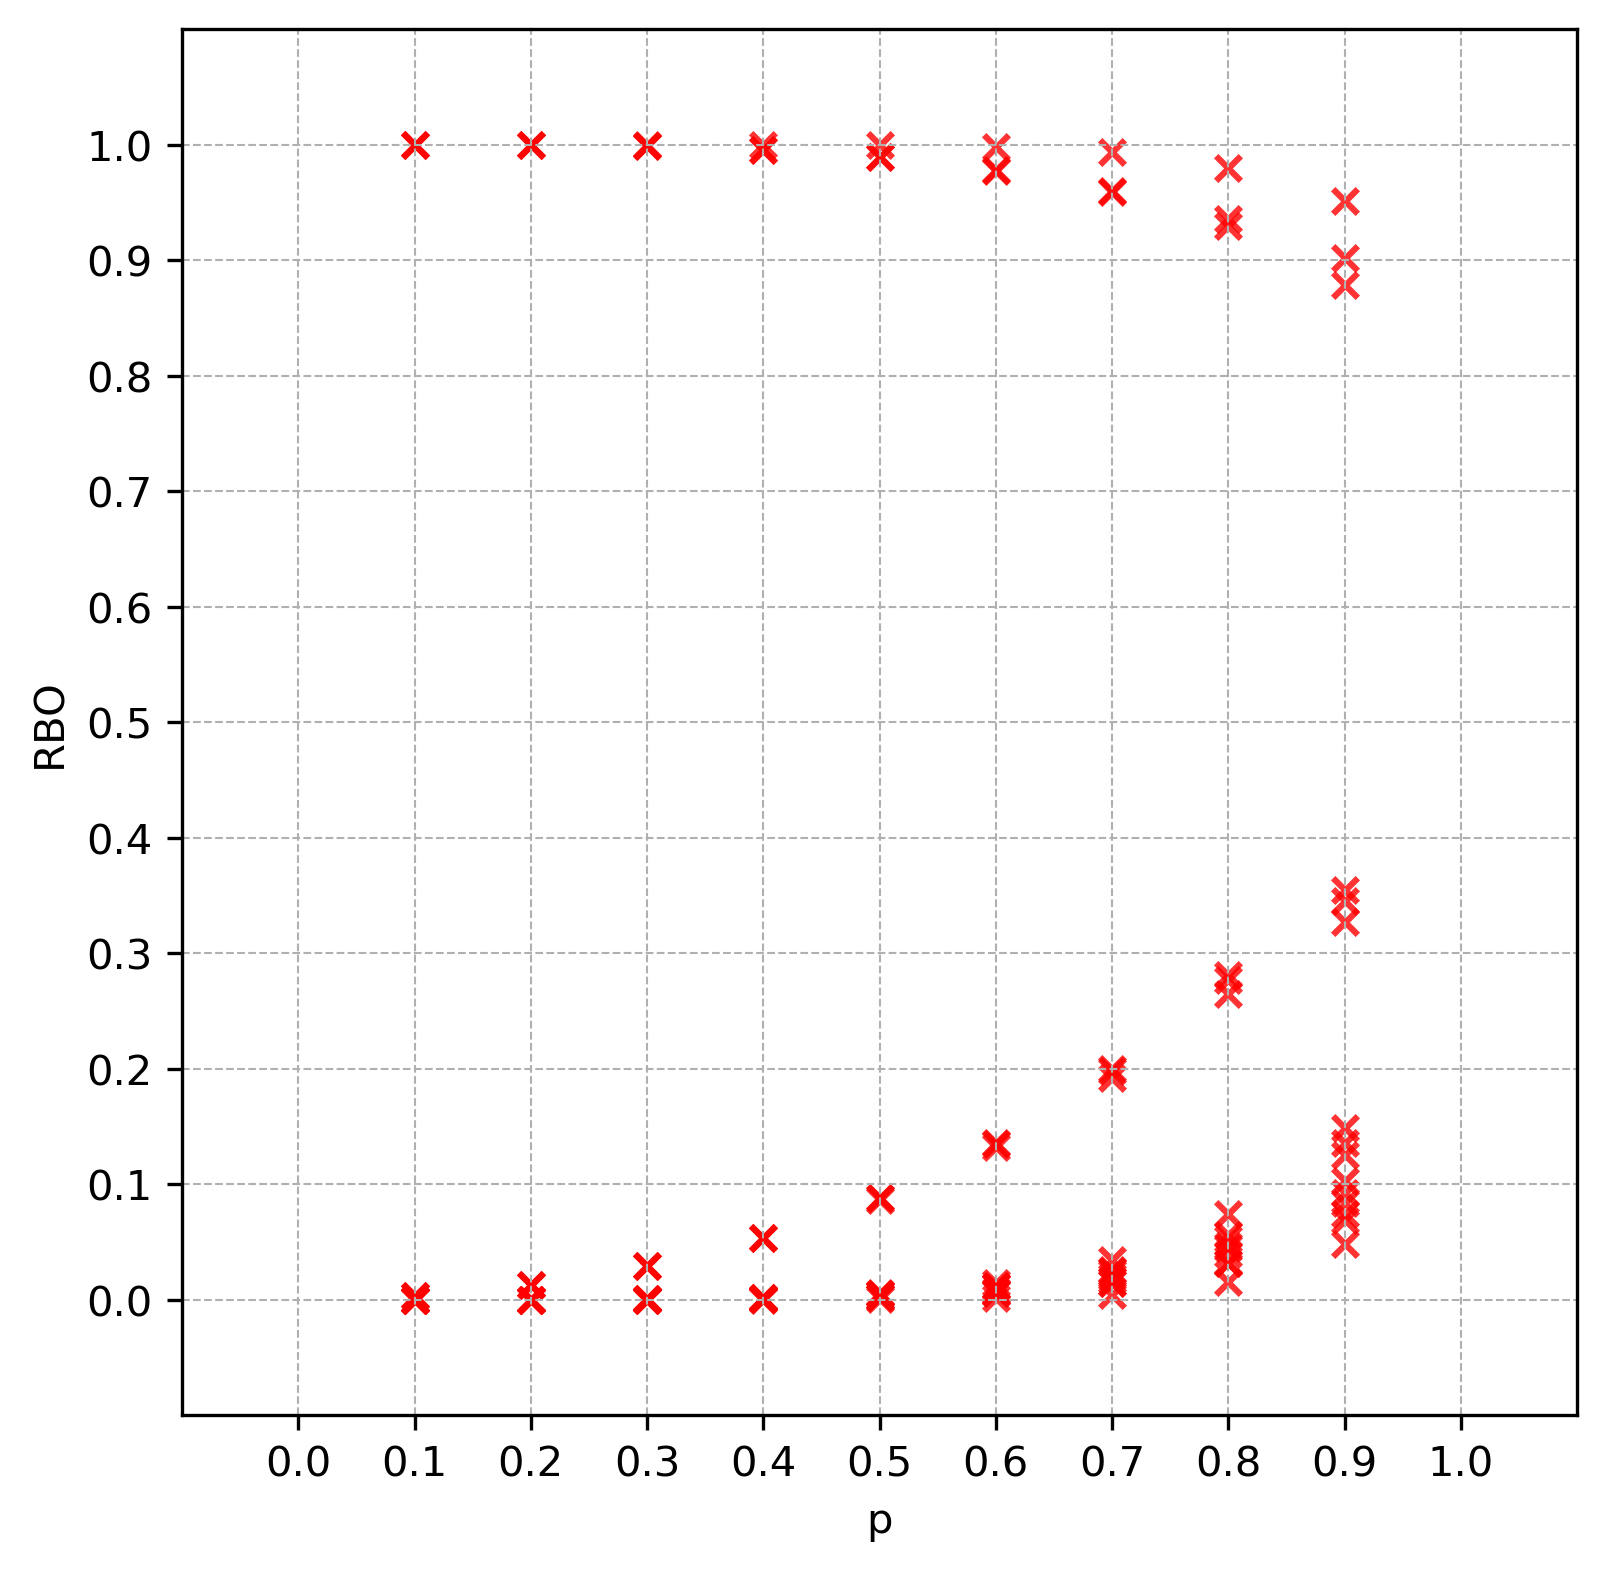

In [64]:
# RANK BASED COMPARISON PLOT


fig = plt.figure(figsize=(6, 6), dpi=300)

ax = fig.add_subplot(1, 1, 1)  # Create an axes object

ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)

# Enable grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# the scatter plot:
ax.scatter(np.full([15],0.1), RBO_1, c='r', s=35,
alpha=0.8, marker='x')

ax.scatter(np.full([15],0.2), RBO_2, c='r', s=35,
alpha=0.8, marker='x')

ax.scatter(np.full([15],0.3), RBO_3, c='r', s=35,
alpha=0.8, marker='x')

ax.scatter(np.full([15],0.4), RBO_4, c='r', s=35,
alpha=0.8, marker='x')

ax.scatter(np.full([15],0.5), RBO_5, c='r', s=35,
alpha=0.8, marker='x')

ax.scatter(np.full([15],0.6), RBO_6, c='r', s=35,
alpha=0.8, marker='x')

ax.scatter(np.full([15],0.7), RBO_7, c='r', s=35,
alpha=0.8, marker='x')

ax.scatter(np.full([15],0.8), RBO_8, c='r', s=35,
alpha=0.8, marker='x')

ax.scatter(np.full([15],0.9), RBO_9, c='r', s=35,
alpha=0.8, marker='x')

ax.set_xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

ax.set_xlabel('p')
ax.set_ylabel('RBO')

plt.show()  # Don't forget to show the plot


In [65]:
RALL.sort_values(by='BF_21', ascending=False)

,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC,BF_21,FC0_edgeR,FC1_edgeR,FC2_edgeR,logFC,PValue,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2,log2FoldChange,pvalue,abs_iFC,abs_FC_edgeR,abs_FC_DESeq2
1175,YDR077W,True,True,True,-3.175344,341558.582413,True,True,True,-3.453363,8.556009e-65,True,True,True,-3.463607,0.000000e+00,3.175344,3.453363,3.463607
3012,YHR174W,True,False,False,-0.847059,205922.035360,True,True,False,-1.106801,1.285923e-37,True,True,False,-1.115810,1.245343e-106,0.847059,1.106801,1.115810
1465,YDR342C,True,True,True,-2.643644,151255.899622,True,True,True,-2.960303,1.837873e-48,True,True,True,-2.971597,3.220281e-231,2.643644,2.960303,2.971597
6209,YOR383C,True,True,False,1.478789,118338.158193,True,True,False,1.208623,1.260857e-34,True,True,False,1.199763,5.723417e-87,1.478789,1.208623,1.199763
2639,YGR192C,True,False,False,-0.456369,101517.928512,True,False,False,-0.721679,1.527392e-19,True,False,False,-0.731271,2.069602e-31,0.456369,0.721679,0.731271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,Q0143,False,False,False,-0.138161,-8.273720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.138161,NaN,NaN
444,YBR121C-A,False,False,False,-0.138161,-8.273720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.138161,NaN,NaN
30,Q0182,False,False,False,-0.138161,-8.273720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.138161,NaN,NaN
7006,tN(GUU)Q,False,False,False,-0.138161,-8.273720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.138161,NaN,NaN
